# 1. 라이브러리 및 데이터 불러오기

## 1-1 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.gridspec as gridspec

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline 


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family ='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 1-2 데이터 불러오기

In [2]:
# 데이터 불러오기
# 주문접수일시, 주문완료일시, 구매확정일시, 구매확정일, 출고지시일, 상태처리일시는 datetime64로 로딩
df_raw = pd.read_excel('D:/대학교/BDAA/공모전/BDAA_1회_내부_공모전_데이터.xlsx',
                   sheet_name = None,
                  dtype = {'주문접수일시':'datetime64',
                           '주문완료일시':'datetime64',
                           '구매확정일시':'datetime64',
                           '출고지시일':'datetime64',
                           '상태처리일시':'datetime64'})

In [3]:
df = pd.concat(df_raw, ignore_index=True)

# 2. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102077 entries, 0 to 102076
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   주문접수일시         102077 non-null  datetime64[ns]
 1   주문번호           102077 non-null  int64         
 2   유입매체           102077 non-null  object        
 3   주문구분           102077 non-null  object        
 4   유입채널           102077 non-null  object        
 5   회원구분           102077 non-null  object        
 6   아이디            98430 non-null   object        
 7   전시유입코드         89492 non-null   object        
 8   상품주문번호         102077 non-null  object        
 9   유형             102077 non-null  object        
 10  배송회수구분         102077 non-null  object        
 11  진행단계           102077 non-null  object        
 12  진행상태 (약식)      0 non-null       float64       
 13  구매확정           102077 non-null  object        
 14  주문완료일시         101745 non-null  datetime64[ns]
 15  

In [5]:
df.shape

(102077, 41)

In [6]:
df.columns

Index(['주문접수일시', '주문번호', '유입매체', '주문구분', '유입채널', '회원구분', '아이디', '전시유입코드',
       '상품주문번호', '유형', '배송회수구분', '진행단계', '진행상태 (약식)', '구매확정', '주문완료일시',
       '구매확정일시', '출고지시일', '예외처리구분', '상태처리일시', '배송상품유형', '배송처리유형', '배송수단',
       '배송예약구분', '배송회차', '전시상품명', '전시단품명', '판매자상품번호', '판매자상품명', '판매자단품번호',
       '판매자단품명', '추가옵션', '주문판매유형', '상품유형', '브랜드', '판매가', '수량', '표준카테고리',
       '모델번호', '롯데맴버스오프라인고객번호', '롯데맴버스온라인고객번호', '회원번호'],
      dtype='object')

In [7]:
# 삭제할 열의 인덱스 찾기 ( 유니크 값이 1개이면 삭제할 것임 )
del_index = []
for i in range(len(df.columns)):
    if len(df.iloc[:,i].unique())==1:
        del_index.append(i)
del_index

[12, 19, 20, 21, 22, 23, 30, 31, 32, 37]

In [8]:
df.iloc[:,del_index].columns

Index(['진행상태 (약식)', '배송상품유형', '배송처리유형', '배송수단', '배송예약구분', '배송회차', '추가옵션',
       '주문판매유형', '상품유형', '모델번호'],
      dtype='object')

In [9]:
# 모두 씨제이제일제당으로 삭제한다.
df['브랜드'].unique()

array(['씨제이제일제당', nan, 'CJ제일제당'], dtype=object)

In [10]:
# 두 컬럼이 정확하게 일치하기 때문에 하나는 삭제한다.
(df['판매자단품명'] != df['전시단품명']).sum()

0

In [11]:
df.isna().sum()

주문접수일시                0
주문번호                  0
유입매체                  0
주문구분                  0
유입채널                  0
회원구분                  0
아이디                3647
전시유입코드            12585
상품주문번호                0
유형                    0
배송회수구분                0
진행단계                  0
진행상태 (약식)        102077
구매확정                  0
주문완료일시              332
구매확정일시             8482
출고지시일              8549
예외처리구분           102053
상태처리일시                0
배송상품유형                0
배송처리유형                0
배송수단                  0
배송예약구분                0
배송회차             102077
전시상품명                 0
전시단품명                 0
판매자상품번호               0
판매자상품명                0
판매자단품번호               0
판매자단품명                0
추가옵션                  0
주문판매유형                0
상품유형                  0
브랜드                   1
판매가                   0
수량                    0
표준카테고리                0
모델번호             102077
롯데맴버스오프라인고객번호     66480
롯데맴버스온라인고객번호      66364
회원번호              62368
dtype: int64

In [12]:
# 결측치를 확인한다.
# 전시유입코드, 진행상태 (약식), 예외처리구분, 배송회차, 모델번호는 결측치가 너무 많아 분석 불가하다고 판단, 삭제
# 하지만 진행상태 (약식), 배송회차, 모델번호 는 이미 위에서 유니크값으로 제거 명단에 오름
# 롯데멤버스온/오프라인 고객번호는 6,7월에만 존재하고 의미가 따로 없다고 판단하여 삭제
# 회원번호 또한 8, 9월에만 존재하여 의미가 없다고 판단, 삭제
na_cols = ['전시유입코드', '예외처리구분', '롯데맴버스오프라인고객번호', '롯데맴버스온라인고객번호', '회원번호', '브랜드', '판매자단품명']

# 3. 데이터 전처리

In [13]:
# 분석에 필요한 컬럼 추가하기
df['주문액'] = df['판매가']*df['수량']
df['월'] = df['주문접수일시'].dt.month
df['일'] = df['주문접수일시'].dt.day
df['요일'] = df['주문접수일시'].dt.day_name()
df['시'] = df['주문접수일시'].dt.hour

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102077 entries, 0 to 102076
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   주문접수일시         102077 non-null  datetime64[ns]
 1   주문번호           102077 non-null  int64         
 2   유입매체           102077 non-null  object        
 3   주문구분           102077 non-null  object        
 4   유입채널           102077 non-null  object        
 5   회원구분           102077 non-null  object        
 6   아이디            98430 non-null   object        
 7   전시유입코드         89492 non-null   object        
 8   상품주문번호         102077 non-null  object        
 9   유형             102077 non-null  object        
 10  배송회수구분         102077 non-null  object        
 11  진행단계           102077 non-null  object        
 12  진행상태 (약식)      0 non-null       float64       
 13  구매확정           102077 non-null  object        
 14  주문완료일시         101745 non-null  datetime64[ns]
 15  

In [15]:
# 삭제할 컬럼 삭제
df = df.drop(df.columns[del_index], axis=1)
df = df.drop(na_cols, axis=1)

In [16]:
df.isna().sum()

주문접수일시        0
주문번호          0
유입매체          0
주문구분          0
유입채널          0
회원구분          0
아이디        3647
상품주문번호        0
유형            0
배송회수구분        0
진행단계          0
구매확정          0
주문완료일시      332
구매확정일시     8482
출고지시일      8549
상태처리일시        0
전시상품명         0
전시단품명         0
판매자상품번호       0
판매자상품명        0
판매자단품번호       0
판매가           0
수량            0
표준카테고리        0
주문액           0
월             0
일             0
요일            0
시             0
dtype: int64

In [17]:
df.head()

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,상품주문번호,유형,배송회수구분,...,판매자상품명,판매자단품번호,판매가,수량,표준카테고리,주문액,월,일,요일,시
0,2022-01-31 23:59:43,2022013116206973,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,alls****,2022013116206973_1,주문,배송,...,[CJ직배송]비비고 플랜테이블왕교자420gX5개,LO1661932052_1661932053,24900,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,24900,1,31,Monday,23
1,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,2022013116204996_1,주문,배송,...,CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개 + 초고추장 증정,LO1501739050_1501739051,26050,1,가공식품 > 장류 > 고추장/초고추장,26050,1,31,Monday,23
2,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,2022013116204996_2,주문,배송,...,CJ 비비고 수제고기만두x2개+수제김치만두x2개,LO1255043241_1255043242,22620,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,22620,1,31,Monday,23
3,2022-01-31 23:35:27,2022013116204259,APP,일반주문,디폴트 채널상세,LPOINT통합회원,fire****,2022013116204259_1,주문,배송,...,스팸 25% 라이트 340g x 6입,LO1135070765_1135070766,40000,1,가공식품 > 통조림/캔 > 햄통조림,40000,1,31,Monday,23
4,2022-01-31 23:21:06,2022013116202890,APP,일반주문,디폴트 채널상세,LPOINT통합회원,dkfm****,2022013116202890_1,주문,배송,...,비비고 소고기장터국 500G *5,LO1234937569_1234937574,22030,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,22030,1,31,Monday,23


# 3. 데이터 분석

 - 1) 브랜드 - 월 판매액 비교
 - 2) 요일별 월별 주문액 추이 확인
 - 3) 시간대별 주문건수
 - 4) 유입매체에 따른 주문건수와 평균 주문 금액 확인

## 3-1 브랜드 - 월 판매액 비교

In [18]:
# 전시상품명을 이용해서 브랜드를 구분하기
df['전시상품명'].unique()

array(['[CJ직배송]비비고 플랜테이블왕교자420gX5개',
       'CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개 + 초고추장 증정',
       'CJ 비비고 수제고기만두x2개+수제김치만두x2개', ...,
       '[구매확정시 주문건당 60,000 Lpoint 자동적립] 스팸3호 x4개  / *엘포인트 통합회원만 가능',
       '[CJ직배송]모닝두부140G*6+유자115G x2',
       '다담 정통된장찌개 양념 140G x 6개+ 다담 차돌고추장찌개양념130G x 6개+ 다담 차돌순두부찌개양념130G x 6개  '],
      dtype=object)

In [19]:
# 처음에 브랜드를 0으로 만들어주기
df['브랜드'] = np.zeros_like(df['주문번호'])
df['브랜드']

0         0
1         0
2         0
3         0
4         0
         ..
102072    0
102073    0
102074    0
102075    0
102076    0
Name: 브랜드, Length: 102077, dtype: int64

In [20]:
# 전시상품명에서 CJ 제일제당 공식홈페이지에 나와있는 브랜드 및 파생 브랜드 이름으로 분류
brand_list = ['비비고', '햇반', '고메', '백설','더건강한', '다시다', 
             '해찬들', '스팸', '삼호어묵', '하선정', '행복한콩', '다담',
             '산들애', '메티에', 'BYO', 'Returnup', '쁘띠첼', '밸런스밀',
             '맥스봉', '맛밤', '한뿌리', '즐거운동행', '쉐프솔루션', '명가', '밀당의고수']
no_list = []
for i in range(len(df['전시상품명'])):
    for j in range(len(brand_list)):
        if brand_list[j] in df['전시상품명'][i]:
            df['브랜드'][i] = brand_list[j]
        else:
            pass
    if df['브랜드'][i] == 0:
        no_list.append(i)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1017742421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['브랜드'][i] = brand_list[j]


In [21]:
# 한 제품에 2개의 브랜드 이름이 들어간 경우 수정 과정
brand_list = ['비비고', '햇반', '고메', '백설','더건강한', '다시다', 
             '해찬들', '스팸', '삼호어묵', '하선정', '행복한콩', '다담',
             '산들애', '메티에', 'BYO', 'Returnup', '쁘띠첼', '밸런스밀',
             '맥스봉', '맛밤', '한뿌리', '즐거운동행', '쉐프솔루션', '명가', '밀당의고수']
count_list = []
for i in range(len(df['전시상품명'])):
    count = 0
    for j in range(len(brand_list)):
        if brand_list[j] in df['전시상품명'][i]:
            count += 1
    count_list.append(count)

In [22]:
index_list = []
for i in range(len(count_list)):
    if count_list[i] == 2:
        index_list.append(i)

In [23]:
df.loc[index_list]['브랜드'].unique()

array(['스팸', '고메', '메티에', '햇반', '쉐프솔루션', '명가'], dtype=object)

In [24]:
# 실제로 이름이 햇반이나 고메 브랜드이지만 스팸으로 분류된 경우가 있다.
df['브랜드'][index_list]

175       스팸
513       스팸
785       스팸
1264      스팸
1412      스팸
          ..
99282     스팸
100119    스팸
100459    스팸
100668    스팸
101596    스팸
Name: 브랜드, Length: 179, dtype: object

In [25]:
# 브랜드 명이 두 개가 있는 상품의 특성을 파악한 뒤 다음과 같이 분류한다.
sub_list = ['햇반', '명가', '스팸부대찌개']
subbrand_list = ['햇반', '명가', '비비고']
for idx in index_list:
    for j in range(len(sub_list)):
        if sub_list[j] in df['전시상품명'][idx]:
            df['브랜드'][idx] = subbrand_list[j]
        else:
            pass
    if df.iloc[idx, -1] not in subbrand_list:
            df.iloc[idx, -1] = 0

In [26]:
# 브랜드 명이 없이 그냥 나와있는 경우가 있어서 인터넷 검색을 통해서 최대한 분류를 했습니다.
sub_list = [['교자', '곰탕', '미역국', '죽', '수제'], ['닭가슴살'], ['피자'],
            ['해바라기','포도씨유','설탕','믹스','올리브유', '카놀라유', '가루', '밥이랑', '솔트', '콩기름', '소스', '요리유','옥수수유'],
            ['삼호'], ['쌈장', '고추장', '그대로끓여', '된장'], ['미초', '워터젤리'], ['매일잡곡밥', '곤약밥', '영양밥', '구운주먹밥']]
subbrand_list = ['비비고', '더건강한', '고메', '백설', '삼호어묵', '해찬들', '쁘띠첼', '햇반']
new_no = []
for i in no_list:
    for j in range(len(sub_list)):
        for word in sub_list[j]:
            if word in df['전시상품명'][i]:
                df['브랜드'][i] = subbrand_list[j]
            else:
                pass
    if df['브랜드'][i] == 0:
        new_no.append(i)

In [27]:
# 아직 브랜드가 분류되지 않은 상품들의 이름
# 결과를 보면 실제로 어디에 들어가는지 직관적으로 보이지 않으며 실제 검색 결과 브랜드가 없이 그냥 CJ제일제당으로 판매된다.
# 따라서 이 값들은 브랜드를 0으로 그대로 둔 상태로 분석할 예정
df['전시상품명'][new_no].unique()

array(['[CJ직배송]가쓰오메밀생면 1136.8G (4인분)', '[CJ직배송]CJ 꼬마 돈까스 450G X3개',
       '[CJ직배송]CJ 꼬마새우까스 310G X3개', '[CJ직배송]특별한선택 Y호',
       '사천마라탕면 2인분 434G x4', '[CJ직배송]더안심 동물복지유정란10구 X2박스',
       '[CJ직배송][22년 설 선물세트]유러피안 P2호 x4개', '[CJ직배송][22년 설 선물세트]유러피안 P2호',
       '[CJ직배송]동치미물냉면 4인분', '[CJ직배송]가쓰오메밀생면568.4g X3개',
       '[CJ직배송]물냉면 2인분+함흥비빔냉면 2인분', '[CJ직배송]CJ 납작군만두 700G X4개',
       '[CJ직배송]CJ 꼬마돈까스 1.2kg', '[CJ직배송]특별한선택 3호', 'CJ 고추군만두 392G x6',
       '[CJ직배송][22년 설 선물세트]특별한선택 2호', '[CJ직배송][22년 설 선물세트]최고의선택 특호',
       '[CJ직배송]함흥비빔냉면2인분474.4GX2개', '[CJ직배송][22년 설 선물세트]최고의선택 프리미엄호',
       '숯불향닭강정 200G *6', ' 숯불향바베큐바 280g*6',
       '[CJ직배송]CJ 미정당 매콤까르보나라 누들떡볶이 X4개', '구이한판 60G x 3개',
       '[CJ직배송]중화요리 간짜장 2인분 630G X2개', '[CJ직배송]4無 맛단무지 260g',
       '[CJ직배송][22년 설 선물세트] 특별한선택 2호 x4개', '[CJ직배송]가쓰오메밀생면 568.4g',
       'CJ  숯불향닭강정 200g*6', '[CJ직배송]정통식 야끼소바 2인분 412g',
       '[CJ직배송]햄스빌 바로먹는햄 목살 120g', '[CJ직배송]가쓰오우동 4인분 933.2g',
       '[CJ직배송]제일제면소 코다리냉면 2인분', '[CJ직배송]가쓰오우동2인+튀김우동2인',
      

In [28]:
# 무시할 데이터의 수
len(new_no)

4852

In [29]:
# 브랜드별 월별 판매량 시각화
# NaN값은 count가 없는 것이므로 구매가 0개이니까 0으로 NaN값을 채운다.
brand_by_month = df.groupby('월')['브랜드'].value_counts().unstack().transpose().fillna(0)
brand_by_month

월,1,2,3,4,5,6,7,8,9
브랜드,,,,,,,,,
0,159.0,49.0,90.0,150.0,232.0,544.0,684.0,2581.0,363.0
고메,257.0,316.0,514.0,365.0,525.0,659.0,1799.0,695.0,267.0
다담,364.0,238.0,277.0,532.0,568.0,1058.0,1768.0,1059.0,629.0
다시다,2.0,3.0,2.0,20.0,18.0,6.0,7.0,14.0,10.0
더건강한,140.0,73.0,101.0,144.0,213.0,215.0,483.0,293.0,378.0
맛밤,6.0,7.0,11.0,19.0,17.0,39.0,21.0,29.0,25.0
맥스봉,48.0,10.0,5.0,13.0,10.0,138.0,39.0,52.0,31.0
메티에,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0
명가,13.0,6.0,15.0,14.0,19.0,24.0,108.0,80.0,30.0


In [30]:
# 시각화를 하기 위해 필요한 변수들만 가져와서 새로운 데이터프레임 생성
df_brand = df[['주문번호','주문액', '브랜드', '월']]

In [31]:
# 브랜드별 월별 주문액 시각화
# Nan값은 주문액이 0인 것이므로 0으로 결측치 처리
sale_sum = df_brand.groupby(['월', '브랜드'])['주문액'].sum().unstack().fillna(0)
sale_sum

브랜드,0,고메,다담,다시다,더건강한,맛밤,맥스봉,메티에,명가,밀당의고수,...,쁘띠첼,산들애,삼호어묵,쉐프솔루션,스팸,즐거운동행,하선정,해찬들,햇반,행복한콩
월,,,,,,,,,,,,,,,,,,,,,
1,19043082.0,6917489.0,6658100.0,55170.0,4114930.0,109680.0,1938356.0,0.0,324540.0,119880.0,...,143150.0,0.0,0.0,781468.0,37731130.0,245550.0,138760.0,1465020.0,7099970.0,80780.0
2,3088448.0,8797828.0,3821939.0,96000.0,1828380.0,235270.0,310320.0,0.0,90360.0,28000.0,...,133750.0,0.0,1810.0,373438.0,926800.0,149500.0,791890.0,875830.0,3102610.0,15196.0
3,8880970.0,15588582.0,6056840.0,39800.0,3406243.0,257928.0,181500.0,21000.0,637370.0,0.0,...,435315.0,17880.0,0.0,461404.0,685680.0,68280.0,81490.0,2687010.0,6509896.0,78112.0
4,13948468.0,11515618.0,12735690.0,9018810.0,4021030.0,720436.0,583340.0,7700.0,330540.0,297460.0,...,723500.0,95760.0,0.0,1077740.0,1176590.0,141090.0,2853300.0,2742360.0,10344220.0,175180.0
5,115088826.0,15241948.0,11989050.0,710800.0,6385670.0,526518.0,256740.0,25710.0,465910.0,133260.0,...,15310630.0,0.0,0.0,1314010.0,1085560.0,39870.0,6840140.0,8967104.0,11747720.0,146860.0
6,70303196.0,18199870.0,20825640.0,183200.0,7458310.0,1274570.0,4447340.0,0.0,1123390.0,90830.0,...,10849640.0,0.0,1580.0,1305840.0,2250890.0,62480.0,10078700.0,12963854.0,207014820.0,63360.0
7,78448095.0,57574000.0,37709850.0,633150.0,21882440.0,682064.0,1277793.0,0.0,2614620.0,118850.0,...,32868840.0,0.0,0.0,2042160.0,7282360.0,139840.0,5710840.0,7260720.0,161948740.0,82140.0
8,172811490.0,20666700.0,23376800.0,682090.0,13144470.0,1058258.0,1324870.0,0.0,2337900.0,42460.0,...,9103740.0,0.0,63230.0,1947610.0,206030200.0,71680.0,15269268.0,17339710.0,332403450.0,94540.0
9,26002380.0,7630170.0,14859660.0,354470.0,12706510.0,715703.0,1756320.0,0.0,1283300.0,27140.0,...,10185040.0,0.0,80670.0,2211910.0,33084060.0,92150.0,10991602.0,3949910.0,47248450.0,31680.0


In [32]:
# 브랜드 == 0 인 상품들은 특정 브랜드를 갖지 않기 때문에 분석에서 제외
df_brand.drop(df_brand[df_brand['브랜드']==0].index, inplace = True)
sale_sum.drop(sale_sum.columns[0], axis = 1, inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1214836761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop(df_brand[df_brand['브랜드']==0].index, inplace = True)


In [33]:
sale_sum

브랜드,고메,다담,다시다,더건강한,맛밤,맥스봉,메티에,명가,밀당의고수,백설,...,쁘띠첼,산들애,삼호어묵,쉐프솔루션,스팸,즐거운동행,하선정,해찬들,햇반,행복한콩
월,,,,,,,,,,,,,,,,,,,,,
1,6917489.0,6658100.0,55170.0,4114930.0,109680.0,1938356.0,0.0,324540.0,119880.0,6616696.0,...,143150.0,0.0,0.0,781468.0,37731130.0,245550.0,138760.0,1465020.0,7099970.0,80780.0
2,8797828.0,3821939.0,96000.0,1828380.0,235270.0,310320.0,0.0,90360.0,28000.0,400045.0,...,133750.0,0.0,1810.0,373438.0,926800.0,149500.0,791890.0,875830.0,3102610.0,15196.0
3,15588582.0,6056840.0,39800.0,3406243.0,257928.0,181500.0,21000.0,637370.0,0.0,2034012.0,...,435315.0,17880.0,0.0,461404.0,685680.0,68280.0,81490.0,2687010.0,6509896.0,78112.0
4,11515618.0,12735690.0,9018810.0,4021030.0,720436.0,583340.0,7700.0,330540.0,297460.0,2873750.0,...,723500.0,95760.0,0.0,1077740.0,1176590.0,141090.0,2853300.0,2742360.0,10344220.0,175180.0
5,15241948.0,11989050.0,710800.0,6385670.0,526518.0,256740.0,25710.0,465910.0,133260.0,2753950.0,...,15310630.0,0.0,0.0,1314010.0,1085560.0,39870.0,6840140.0,8967104.0,11747720.0,146860.0
6,18199870.0,20825640.0,183200.0,7458310.0,1274570.0,4447340.0,0.0,1123390.0,90830.0,2778940.0,...,10849640.0,0.0,1580.0,1305840.0,2250890.0,62480.0,10078700.0,12963854.0,207014820.0,63360.0
7,57574000.0,37709850.0,633150.0,21882440.0,682064.0,1277793.0,0.0,2614620.0,118850.0,1671770.0,...,32868840.0,0.0,0.0,2042160.0,7282360.0,139840.0,5710840.0,7260720.0,161948740.0,82140.0
8,20666700.0,23376800.0,682090.0,13144470.0,1058258.0,1324870.0,0.0,2337900.0,42460.0,48135300.0,...,9103740.0,0.0,63230.0,1947610.0,206030200.0,71680.0,15269268.0,17339710.0,332403450.0,94540.0
9,7630170.0,14859660.0,354470.0,12706510.0,715703.0,1756320.0,0.0,1283300.0,27140.0,2489520.0,...,10185040.0,0.0,80670.0,2211910.0,33084060.0,92150.0,10991602.0,3949910.0,47248450.0,31680.0


In [34]:
# 그래프의 통일성을 위해 정렬
df_brand.sort_values(['월', '브랜드'], inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\3213824590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.sort_values(['월', '브랜드'], inplace = True)


In [35]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(5,2)

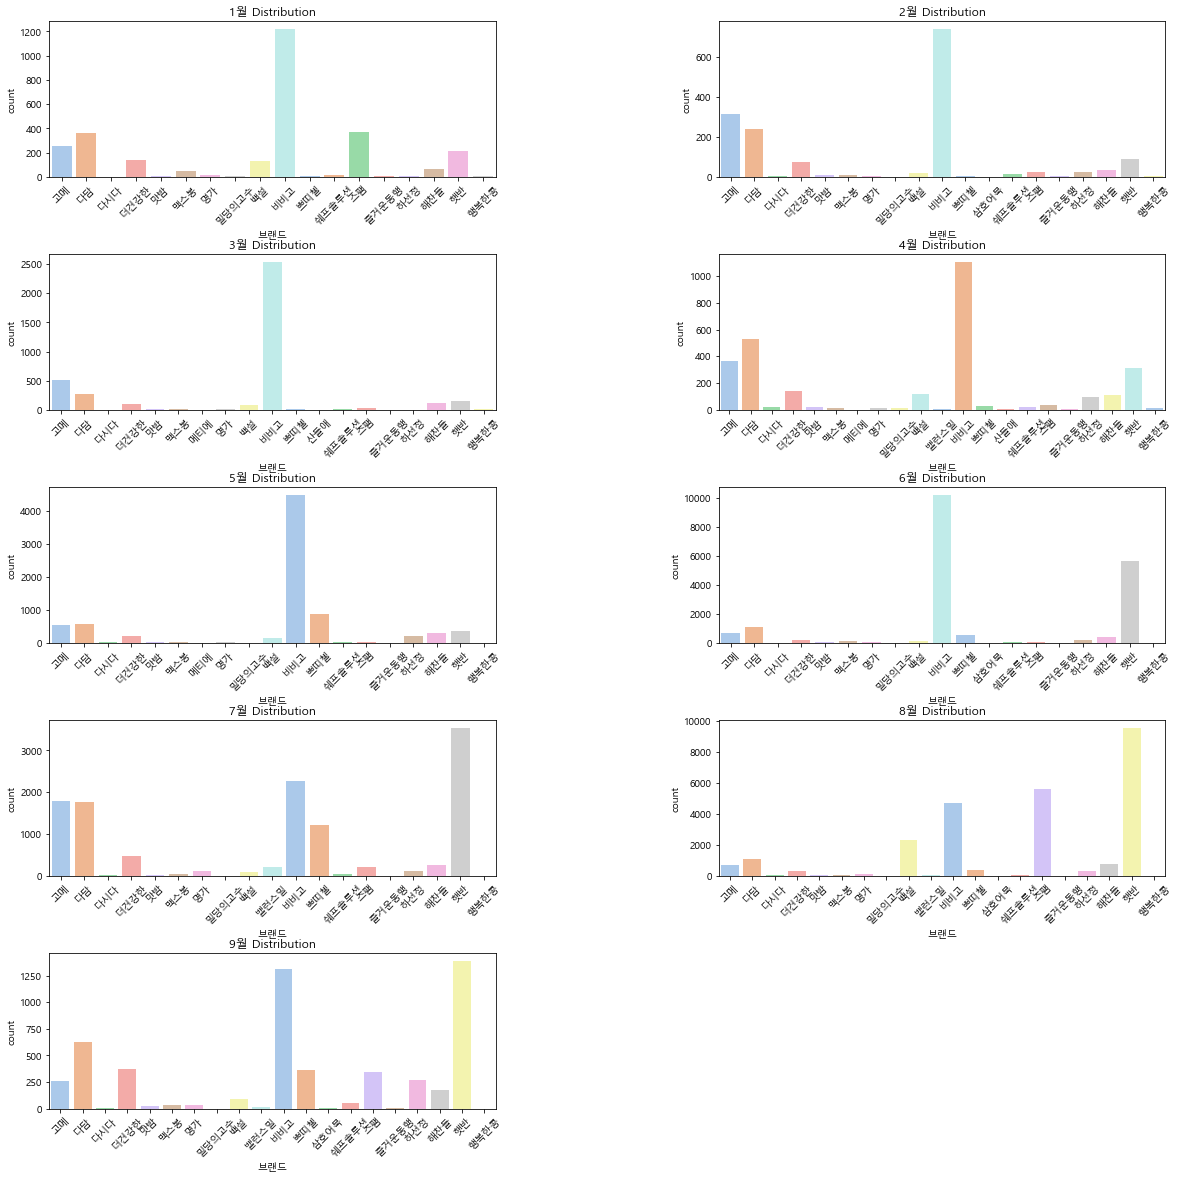

In [36]:
# 월별 브랜드별 주문건수에 대한 countplot
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

for idx in range(len(df_brand['월'].unique())):
    ax = plt.subplot(grid[idx])
    sns.countplot(x = '브랜드',
                 data = df_brand[df_brand['월']==idx+1],
                 palette = 'pastel')
    ax.set_title(f'{idx+1}월 Distribution')
    plt.xticks(rotation = 45)

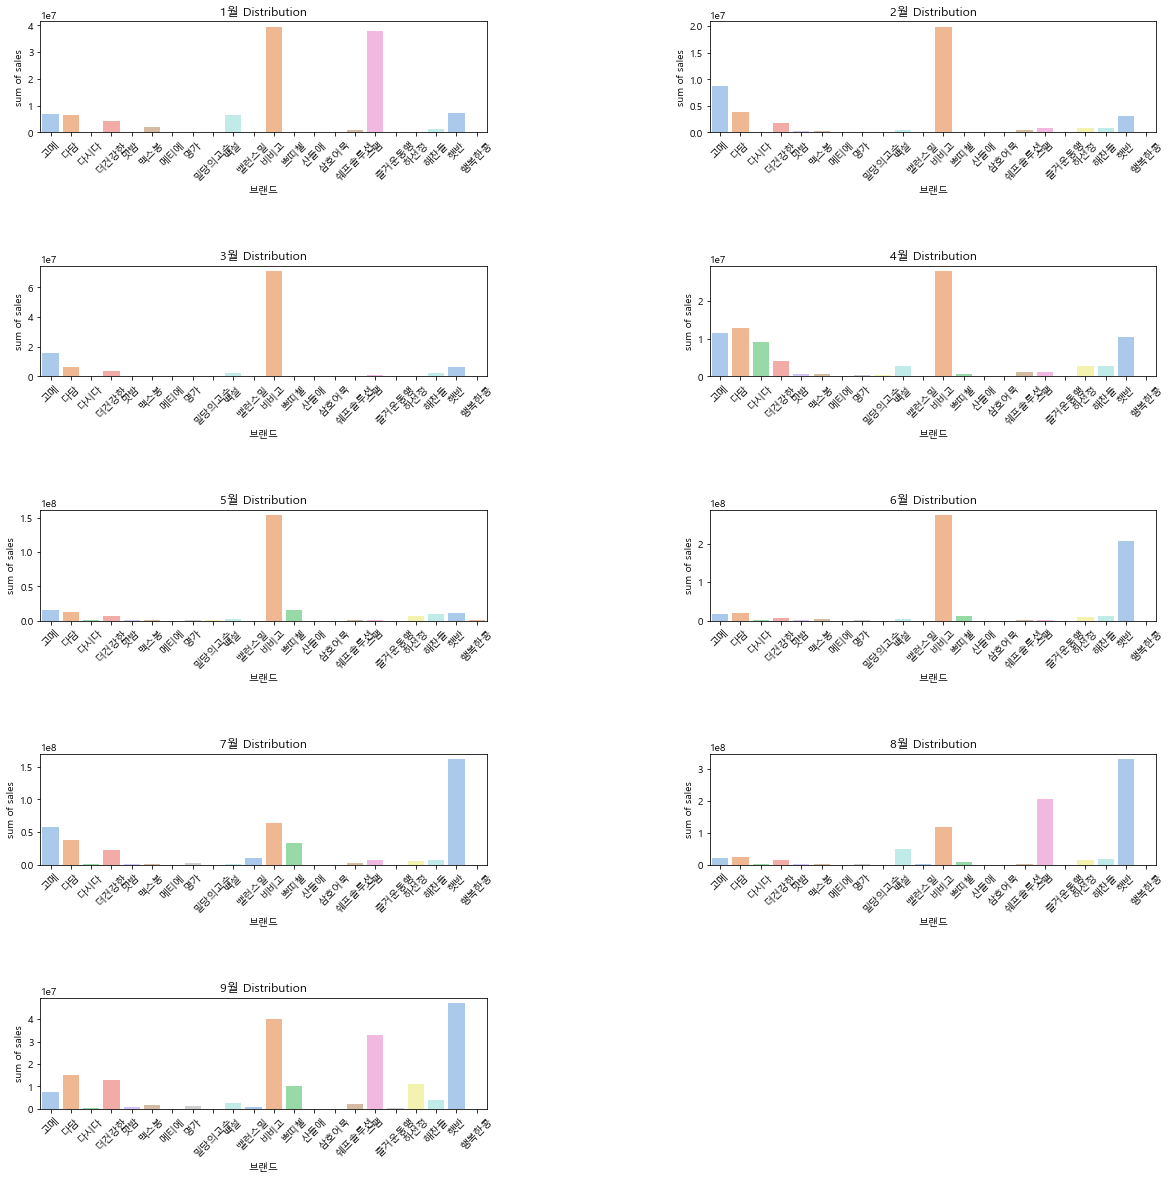

In [37]:
# 월별 브랜드별 총주문액에 대한 barplot
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 1.2)

for idx in range(len(df_brand['월'].unique())):
    ax = plt.subplot(grid[idx])
    sns.barplot(x = sale_sum.columns, y = sale_sum.iloc[idx,:],
                 palette = 'pastel')
    ax.set_title(f'{idx+1}월 Distribution')
    plt.ylabel('sum of sales')
    plt.xticks(rotation = 45)

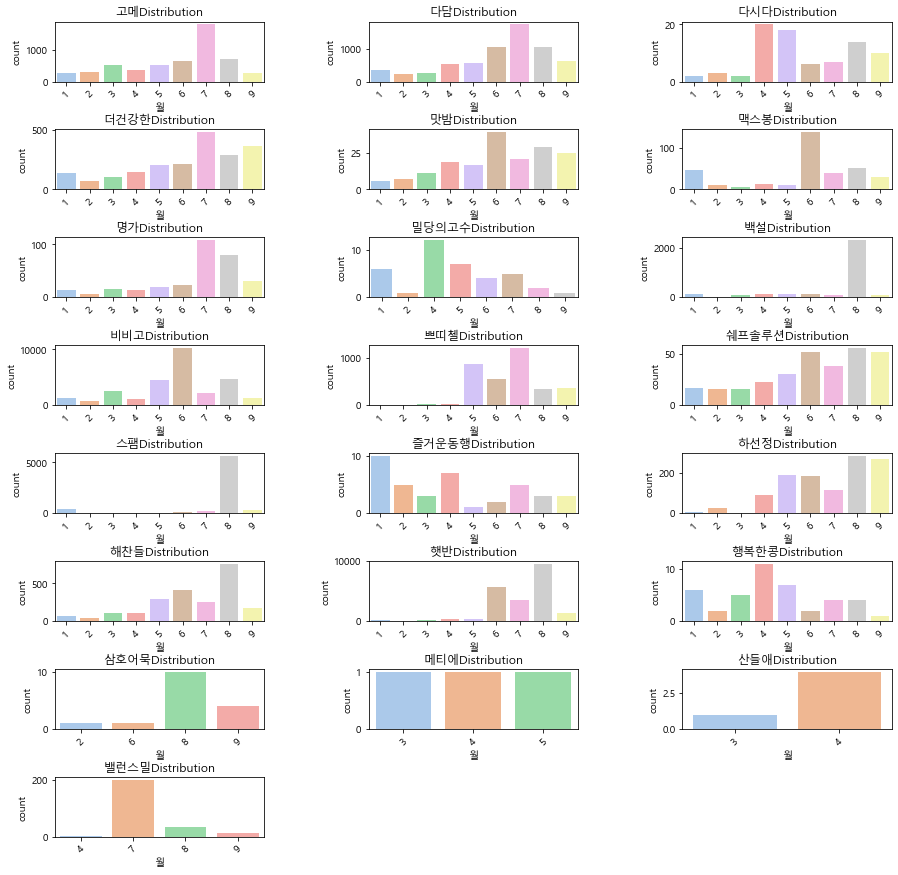

In [38]:
# 브랜드별 월별 주문건수에 대한 countplot
grid = gridspec.GridSpec(8,3)
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.8)

for idx in range(len(df_brand['브랜드'].unique())):
    ax = plt.subplot(grid[idx])
    sns.countplot(x = '월',
                data = df_brand[['월','브랜드']][df_brand['브랜드'] == df_brand['브랜드'].unique()[idx]],
                palette = 'pastel')
    ax.set_title('{0}Distribution'.format(df_brand['브랜드'].unique()[idx]))
    plt.xticks(rotation = 45)

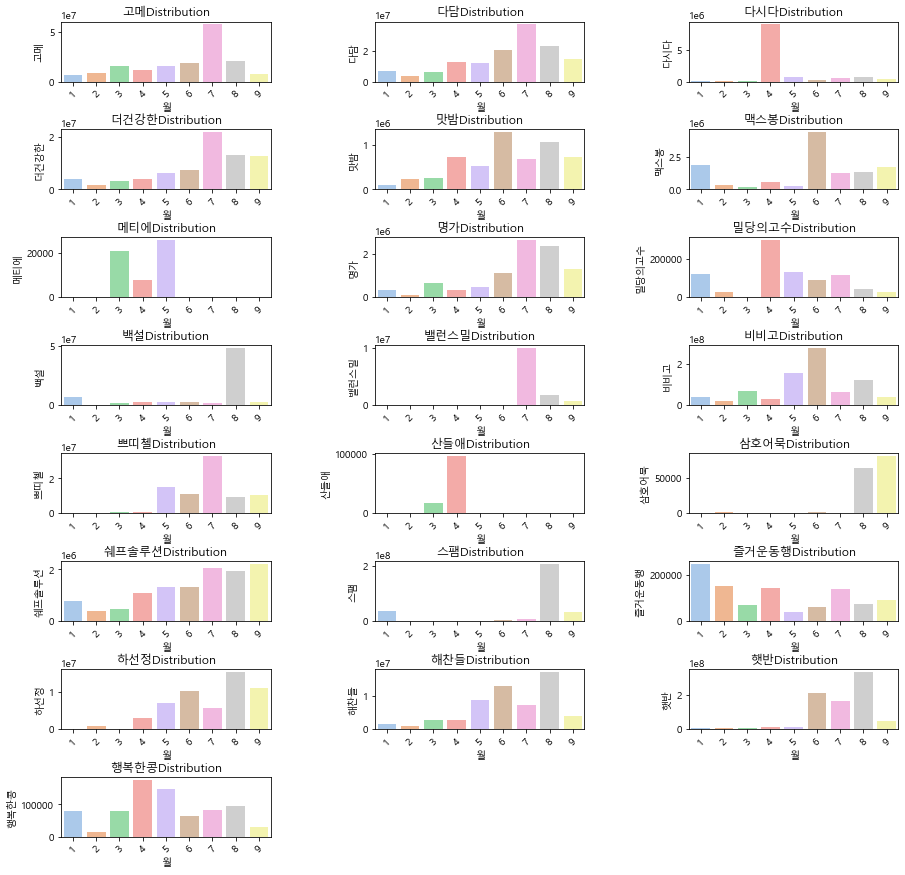

In [39]:
# 브랜드별 월별 총주문액에 대한 barplot
grid = gridspec.GridSpec(8,3)
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.8)

for idx in range(len(df_brand['브랜드'].unique())):
    ax = plt.subplot(grid[idx])
    sns.barplot(x = sale_sum.index, y = sale_sum.iloc[:,idx],
                palette = 'pastel')
    ax.set_title('{0}Distribution'.format(sale_sum.columns[idx]))
    plt.xticks(rotation = 45)

## 3-2 요일별 월별 주문액 추이 확인

In [40]:
m_sum = pd.pivot_table(data=df,
                   index='월',
                   values='주문액',aggfunc='sum').reset_index()

m_sum

,월,주문액
0,1,133075747
1,2,44968578
2,3,119258980
3,4,103297653
4,5,353585139
5,6,646516214
6,7,494131772
7,8,987290226
8,9,216344255


<AxesSubplot:xlabel='월', ylabel='주문액'>

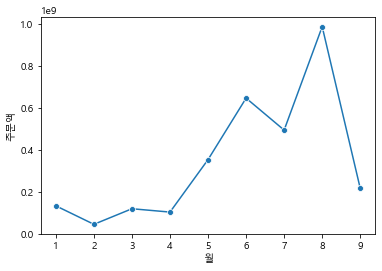

In [41]:
#월별 주문액 추이
sns.lineplot(data=m_sum, x='월',y='주문액',marker='o')

#8월 최대, 2월 최소

In [42]:
ww_sum = pd.pivot_table(data=df,
                   index='요일',
                   values='주문액',aggfunc='sum').reset_index()

w_sum = ww_sum.reindex(index=[1,5,6,4,0,2,3])

w_sum

,요일,주문액
1,Monday,458464818
5,Tuesday,296925075
6,Wednesday,631940556
4,Thursday,507220957
0,Friday,379851722
2,Saturday,335336804
3,Sunday,488728632


<AxesSubplot:xlabel='요일', ylabel='주문액'>

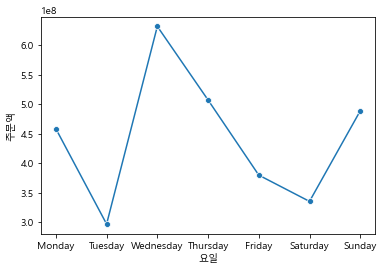

In [43]:
#요일별 주문액 추이
sns.lineplot(data=w_sum, x='요일',y='주문액', marker='o')

#수요일 최대, 화요일 최소

In [49]:
df.set_index('주문접수일시', inplace = True)

In [55]:
df['주문접수일시'] = df.index

In [56]:
week = df.resample(rule='W').sum()

#더 자세한 분석을 위해 resample함수로 1주단위 주문액 추이 확인함

In [57]:
week

,주문번호,판매가,수량,주문액,월,일,시
주문접수일시,,,,,,,
2022-01-02,1.233426e+17,1195500.0,79.0,1484600.0,61.0,89.0,910.0
2022-01-09,2.598284e+18,26638830.0,2205.0,40189020.0,1285.0,9145.0,19811.0
2022-01-16,1.623675e+18,18819610.0,1655.0,38512990.0,803.0,9770.0,11485.0
2022-01-23,1.324418e+18,18803909.0,1217.0,33936222.0,655.0,12876.0,9677.0
2022-01-30,8.997956e+17,12113638.0,663.0,18559151.0,445.0,11244.0,6240.0
2022-02-06,3.437433e+17,3298254.0,260.0,3929752.0,322.0,1100.0,2396.0
2022-02-13,1.838017e+18,20720502.0,1071.0,22744411.0,1818.0,8651.0,12828.0
2022-02-20,4.367567e+17,4886498.0,285.0,5608840.0,432.0,3717.0,3129.0
2022-02-27,6.308710e+17,7802614.0,376.0,8709453.0,624.0,7504.0,4677.0


<AxesSubplot:xlabel='주문접수일시', ylabel='주문액'>

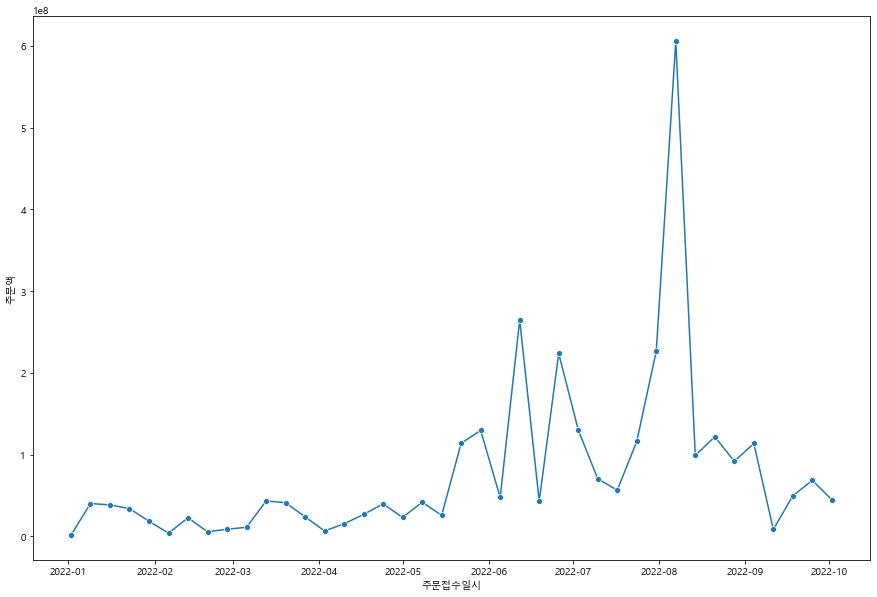

In [58]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=week, x='주문접수일시',y='주문액', marker='o')

#8월 둘째주의 매출이 급등한 것을 볼 수 있음

In [59]:
#8월 둘째주의 자세한 주문액 추이 파악을 위해 8월 일별 추이 그래프 그리기

df['일'] = df['주문접수일시'].dt.day

In [60]:
df_8 = df.loc[df['월']==8]
day8 = df_8.resample(rule='D').sum()
day8

,주문번호,판매가,수량,주문액,월,일,시
주문접수일시,,,,,,,
2022-08-01,1.055526e+18,15193948.0,608.0,16773788.0,4176.0,522.0,7764.0
2022-08-02,1.093945e+18,19030470.0,599.0,20263630.0,4328.0,1082.0,7882.0
2022-08-03,1.306871e+19,145342260.0,6909.0,154467120.0,51704.0,19389.0,115685.0
2022-08-04,4.284788e+18,63710148.0,2283.0,67105608.0,16952.0,8476.0,22355.0
2022-08-05,4.389937e+18,53557120.0,2318.0,56141710.0,17368.0,10855.0,26049.0
2022-08-06,8.335016e+18,87432930.0,4337.0,91347746.0,32976.0,24732.0,83347.0
2022-08-07,1.698143e+19,192912800.0,8789.0,200019090.0,67184.0,58786.0,91610.0
2022-08-08,1.528693e+18,21001570.0,841.0,22613820.0,6048.0,6048.0,12035.0
2022-08-09,1.178873e+18,16273308.0,658.0,17536412.0,4664.0,5247.0,8166.0


<AxesSubplot:xlabel='주문접수일시', ylabel='주문액'>

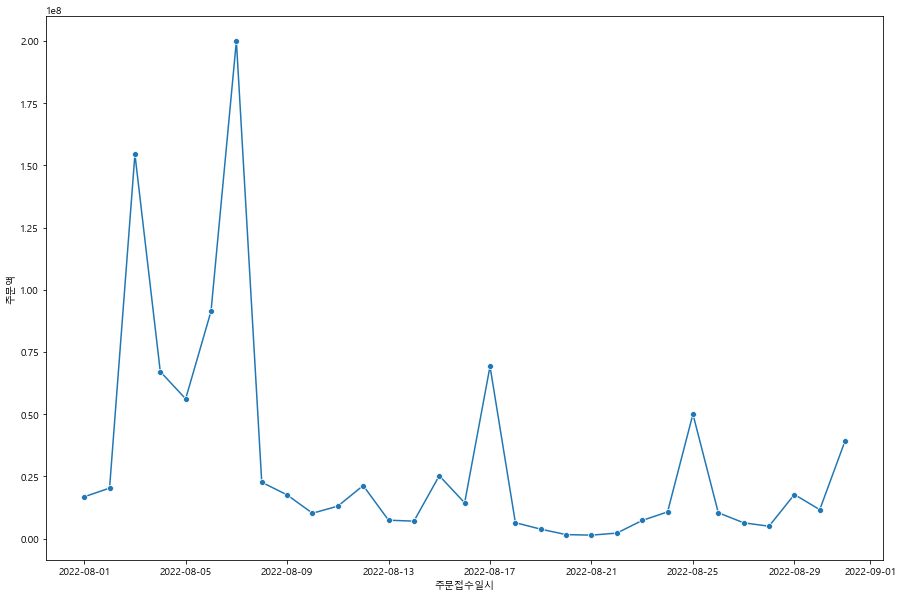

In [61]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=day8, x='주문접수일시',y='주문액', marker='o')

#8월 7일의 매출이 두드러지게 많은 것을 볼 수 있다

In [62]:
#count를 위해 c컬럼에 1을 넣어줌

df_8['c'] = 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\2444289935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['c'] = 1


In [63]:
df_8_cate = df_8.groupby(df_8['표준카테고리'])['c'].count()
df_8_cate.sort_values(ascending=False).to_frame()

#즉석밥의 비율이 압도적으로 많음

,c
표준카테고리,
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,11375
냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,4935
가공식품 > 통조림/캔 > 햄통조림,4664
냉장/냉동/간편식 > 떡볶이/만두 > 만두,2632
가공식품 > 식용유/오일 > 카놀라유,2247
냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스,1992
가공식품 > 장류 > 고추장/초고추장,788
가공식품 > 통조림/캔 > 캔/통조림선물세트,731
가공식품 > 소스/드레싱 > 기타소스,589


In [64]:
df_8['즉석밥'] = df_8['표준카테고리'].str.contains('즉석밥')

p11 = pd.pivot_table(data=df_8,
                   index='일',
                   values='즉석밥',aggfunc='sum')

p11

#8월 일별 즉석밥 주문량 확인

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\823765545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['즉석밥'] = df_8['표준카테고리'].str.contains('즉석밥')


,즉석밥
일,
1,139
2,292
3,526
4,693
5,1683
6,615
7,2468
8,425
9,199


In [65]:
a = df_8.loc[df_8['표준카테고리'].str.contains('즉석밥')]
a

,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,상품주문번호,유형,배송회수구분,진행단계,...,표준카테고리,주문액,월,일,요일,시,브랜드,주문접수일시,c,즉석밥
주문접수일시,,,,,,,,,,,,,,,,,,,,,
2022-08-31 23:59:38,2022083115013741,APP,일반주문,디폴트 채널상세,LPOINT통합회원,rosa0309,2022083115013741_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,66000,8,31,Wednesday,23,햇반,2022-08-31 23:59:38,1,True
2022-08-31 23:59:34,2022083115013721,APP,일반주문,디폴트 채널상세,LPOINT통합회원,sor28,2022083115013721_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33000,8,31,Wednesday,23,햇반,2022-08-31 23:59:34,1,True
2022-08-31 23:59:16,2022083115013568,APP,일반주문,디폴트 채널상세,LPOINT통합회원,8234pooh,2022083115013568_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,비비고,2022-08-31 23:59:16,1,True
2022-08-31 23:59:00,2022083115013483,APP,선물하기,디폴트 채널상세,LPOINT통합회원,kjsland,2022083115013483_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,비비고,2022-08-31 23:59:00,1,True
2022-08-31 23:58:57,2022083115013468,MO WEB,일반주문,유실 채널상세,LPOINT통합회원,howkim,2022083115013468_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,비비고,2022-08-31 23:58:57,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01 01:32:37,2022080111174704,APP,일반주문,디폴트 채널상세,LPOINT통합회원,asnu07125,2022080111174704_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,46000,8,1,Monday,1,햇반,2022-08-01 01:32:37,1,True
2022-08-01 01:18:02,2022080111173431,PC,일반주문,유실 채널상세,LPOINT통합회원,kmkyu,2022080111173431_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,85700,8,1,Monday,1,햇반,2022-08-01 01:18:02,1,True
2022-08-01 01:07:29,2022080111172321,APP,일반주문,디폴트 채널상세,LPOINT통합회원,hslove12,2022080111172321_1,주문,배송,배송완료,...,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,28000,8,1,Monday,1,햇반,2022-08-01 01:07:29,1,True


In [66]:
df_8_b = a.groupby(a['전시상품명'])['c'].count()
df_8_b.sort_values(ascending=False).to_frame().head(10)

#[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1] 
#큼직한 프로모션이 두 개(서울체크인, 배그에디션)
#상위 5개의 제품이 모두 햇반

,c
전시상품명,
"[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]",2032
[CJ직배송] CJ 햇반 백미 210g x 36개,1602
[햇반 솥반 X 서울체크인]햇반 솥반 7종,1442
"[컵반 배그에디션]이겼닭 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,000코인 랜덤 증정)",1110
[CJ직배송] New 햇반 210g*3입X 8개(총24개),792
이겼닭 오늘 저녁은 치킨이닭(컵반 배틀그라운드),613
[전참시 속 보양식사]누룽지닭백숙죽/전복삼계죽/녹두닭죽 外 + 보양닭백숙죽 증정,534
[CJ직배송]햇반 흑미밥 210gX36개[1박스],522
"[L.Point 5,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]",345


In [67]:
c = a.loc[a['전시상품명']=='[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]']
c['판매가'].unique()

array([27500, 36000], dtype=int64)

In [68]:
cc = c.groupby(c['판매가'])['c'].count()
cc.to_frame()

#현재는 36000원에 판매중
#36000원에 구매한 소비자도 있지만 그보다 많은 사람들이 27500원에 구매.
#위 상품을 8500원, 약 23% 할인한 것이 매출 상승의 큰 요인으로 보임

,c
판매가,
27500,1050
36000,982


## 3-3 시간대별 주문건수

In [87]:
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [88]:
mt_num = pd.DataFrame(columns = ['월', '시간대', '평균주문건수'])

In [89]:
# 각 월마다 시간대별 평균주문건수를 나타내는 데이터프레임 생성
for m in np.arange(1, 10):
    for t in np.arange(0, 24):
        d_ct = df[(df['월'] == m) & (df['시'] == t)].groupby(['일']).agg(ct = ('주문번호', 'count'))
        num = round(d_ct['ct'].mean(), 2)
        mt_num = mt_num.append(pd.DataFrame([[m, t, num]], columns = ['월', '시간대', '평균주문건수']))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1148345014.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mt_num = mt_num.append(pd.DataFrame([[m, t, num]], columns = ['월', '시간대', '평균주문건수']))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1148345014.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mt_num = mt_num.append(pd.DataFrame([[m, t, num]], columns = ['월', '시간대', '평균주문건수']))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1148345014.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mt_num = mt_num.append(pd.DataFrame([[m, t, num]], columns = ['월', '시간대', '평균주문건수']))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1148345014.py:6: FutureWarning: The frame.append method is deprecated and will be 

In [90]:
mt_num = mt_num.reset_index(drop = True)
mt_num

,월,시간대,평균주문건수
0,1,0,4.69
1,1,1,3.7
2,1,2,1.8
3,1,3,2.45
4,1,4,1.38
...,...,...,...
211,9,19,9.54
212,9,20,13.0
213,9,21,14.07
214,9,22,15.34


Text(0.5, 1.0, '시간대에 따른 평균주문건수의 변화')

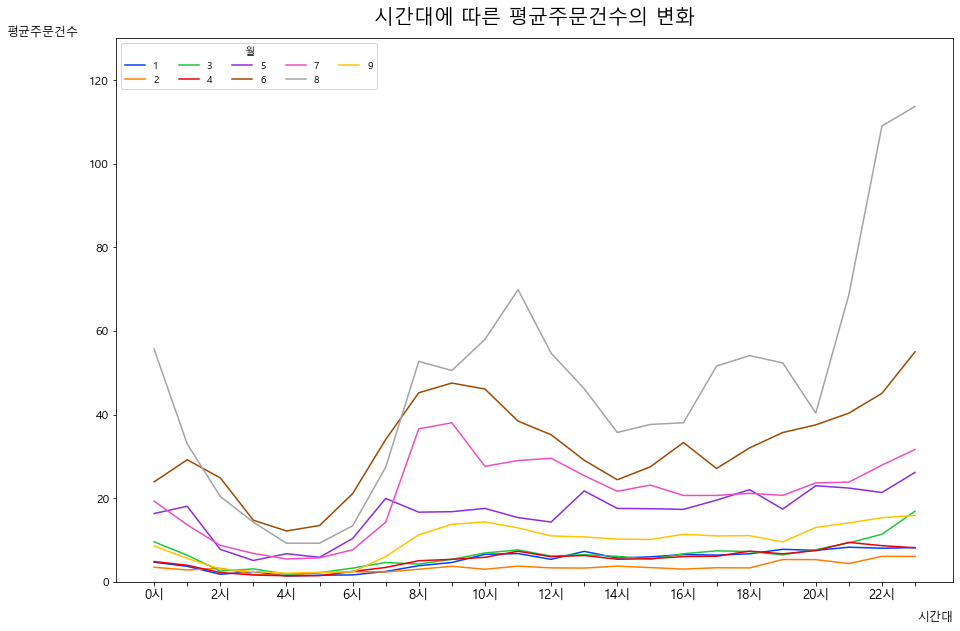

In [91]:
fig = plt.figure(figsize = (15, 10))

sns.lineplot(x = '시간대', y = '평균주문건수', hue = '월', data = mt_num, palette = 'bright')

plt.ylim(0, 130)
plt.xticks(np.arange(0, 24),
          labels = ['0시', '', '2시', '', '4시', '', '6시', '', '8시', '', '10시', '',
                    '12시', '', '14시', '', '16시', '', '18시', '', '20시', '', '22시', ''])

plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 12)

plt.xlabel('시간대', labelpad = 10, fontdict = {'size' : 12}, loc = 'right')
plt.ylabel('평균주문건수', labelpad = 10, fontdict = {'size' : 12}, loc = 'top', rotation = 0)

plt.legend(loc = 'upper left', ncol = 5, title = '월')
plt.title('시간대에 따른 평균주문건수의 변화', pad = 15, size = 20)

> 전체적으로 0시부터 4시까지는 감소, 10시에서 11시까지는 증가하다가 다시 감소하는 경향이 있다.          
  그 이후로 비슷한 주문건수를 유지하다가 20시 이후로 다시 증가하는 것을 알 수 있다.

> 다른 달에 비해 5, 6, 7, 8월에는 시간대별로 주문건수의 변화의 폭이 크다.

> 특히 8월에는 21시에 주문량이 급증한 것을 볼 수 있다.

### 월별 주문량 많은 상품

In [92]:
mon_top7 = pd.DataFrame(columns = ['월', '상품명', '카테고리', '주문건수'])

In [93]:
# 각 월마다 가장 많이 주문한 7개 상품 추출한 데이터프레임 생성
for m in np.arange(1, 10):
    d = pd.DataFrame(df[(df['월'] == m)][['전시상품명', '표준카테고리']].value_counts()[:7]).reset_index()
    d.columns = ['상품명', '카테고리', '주문건수']
    size = d.shape[0]
    d.insert(0, '월', [m] * size)
    mon_top7 = mon_top7.append(d)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1466675418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mon_top7 = mon_top7.append(d)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1466675418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mon_top7 = mon_top7.append(d)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1466675418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mon_top7 = mon_top7.append(d)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1466675418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mon_top7 = mon_top7.append(d)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12196\1466675418.py:7: 

In [94]:
mon_top7 = mon_top7.reset_index(drop = True)
mon_top7_new = mon_top7.set_index('상품명')
mon_top7_new

,월,카테고리,주문건수
상품명,,,
[CJ직배송]CJ비비고왕교자1.05KG X 2개,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,221
CJ 비비고 사골곰탕 500g x18봉,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,166
[CJ직배송]포도씨유 900ML X 2개,1,가공식품 > 식용유/오일 > 카놀라유,110
CJ 다담 된장찌개양념 530G X 4개,1,가공식품 > 장류 > 된장/쌈장/청국장,107
[CJ직배송][22년 설 선물세트]스팸마일드8호,1,가공식품 > 통조림/캔 > 캔/통조림선물세트,86
...,...,...,...
비비고 사골곰탕 500g x18봉,9,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,201
[CJ직배송]포도+사과+오렌지 워터젤리 총 30개[각10개씩],9,과자/간식 > 캔디/껌/캐러멜 > 젤리/푸딩,174
[CJ직배송]햇반작은공기130G x36개,9,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,170


In [95]:
grid = gridspec.GridSpec(9, 1)

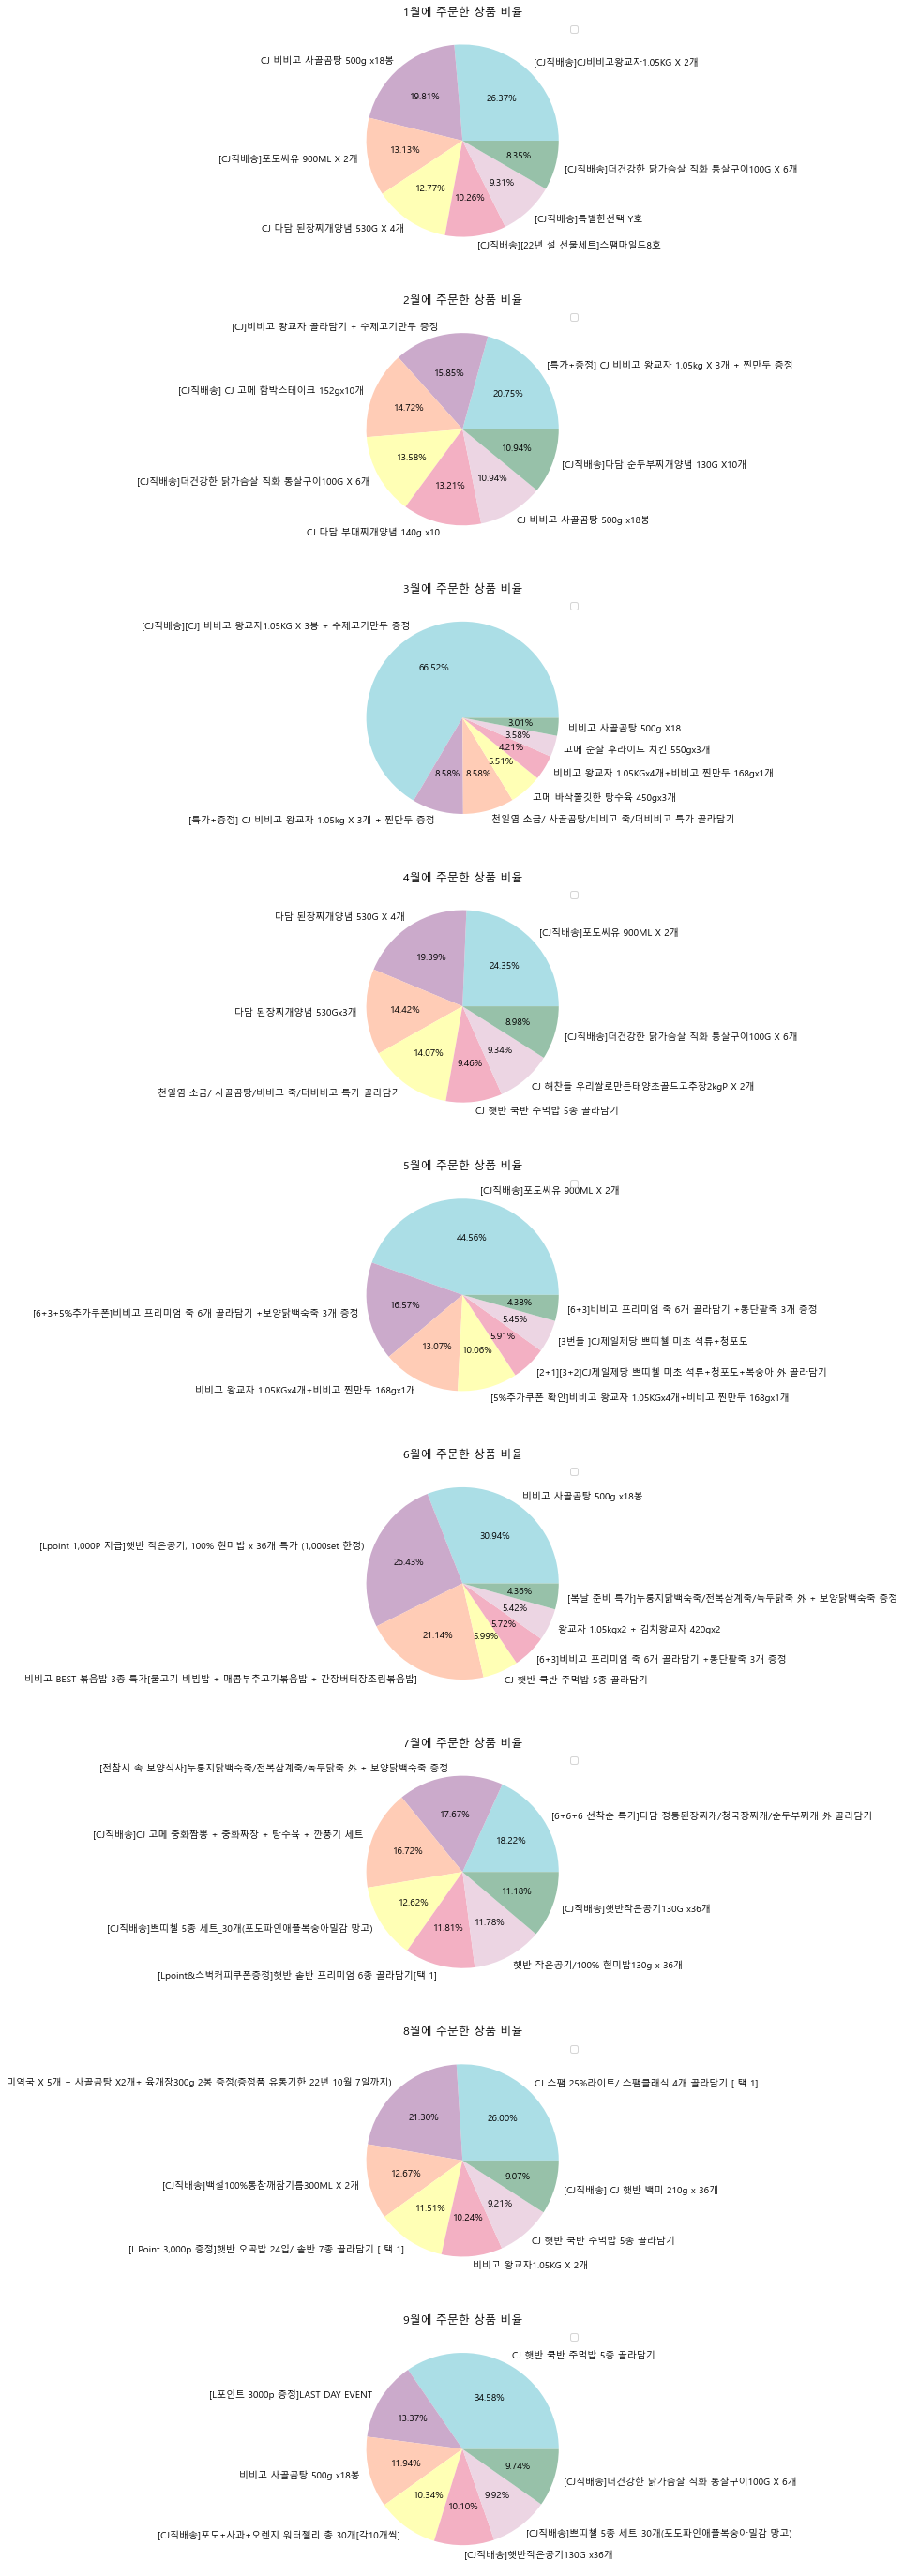

In [96]:
# 각 월별 주문건수 많은 상품의 비율
plt.figure(figsize = (20,50))
color = ['#ABDEE6', '#CBAACB', '#FFCCB6', '#FFFFB5', '#F3B0C3', '#ECD5E3', '#97C1A9']

for month in np.arange(1, 10):
    ax = plt.subplot(grid[month - 1])
    mon_top7_new[mon_top7_new['월'] == month].plot.pie(x = '상품명', y = '주문건수',
                                                       autopct = '%1.2f%%', colors = color, ax = ax)
    ax.set_title(f'{month}월에 주문한 상품 비율')
    ax.set_ylabel('')
    ax.legend('')
plt.show()

- 3월에는 왕교자, 5월에는 포도씨유, 9월에는 햇반 쿡반 주먹밥 5종 골라담기의 주문량이 다른 상품에 비해 압도적으로 높음을 알 수 있다.

In [97]:
a = mon_top7['상품명'].to_list()

In [98]:
res = " ".join(a)
print(res)

[CJ직배송]CJ비비고왕교자1.05KG X 2개 CJ 비비고 사골곰탕 500g x18봉 [CJ직배송]포도씨유 900ML X 2개 CJ 다담 된장찌개양념 530G X 4개 [CJ직배송][22년 설 선물세트]스팸마일드8호 [CJ직배송]특별한선택 Y호 [CJ직배송]더건강한 닭가슴살 직화 통살구이100G X 6개 [특가+증정] CJ 비비고 왕교자 1.05kg X 3개 + 찐만두 증정 [CJ]비비고 왕교자 골라담기 + 수제고기만두 증정 [CJ직배송] CJ 고메 함박스테이크 152gx10개 [CJ직배송]더건강한 닭가슴살 직화 통살구이100G X 6개 CJ 다담 부대찌개양념 140g x10 CJ 비비고 사골곰탕 500g x18봉 [CJ직배송]다담 순두부찌개양념 130G X10개 [CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정 [특가+증정] CJ 비비고 왕교자 1.05kg X 3개 + 찐만두 증정 천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기 고메 바삭쫄깃한 탕수육 450gx3개 비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개 고메 순살 후라이드 치킨 550gx3개 비비고 사골곰탕 500g X18 [CJ직배송]포도씨유 900ML X 2개 다담 된장찌개양념 530G X 4개 다담 된장찌개양념 530Gx3개 천일염 소금/ 사골곰탕/비비고 죽/더비비고 특가 골라담기 CJ 햇반 쿡반 주먹밥 5종 골라담기 CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개  [CJ직배송]더건강한 닭가슴살 직화 통살구이100G X 6개 [CJ직배송]포도씨유 900ML X 2개 [6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정 비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개 [5%추가쿠폰 확인]비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개 [2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기 [3번들 ]CJ제일제당 쁘띠첼 미초 석류+청포도 [6+3]비비고 프리미엄 죽 6

In [99]:
res = res.replace('[', ' ')
res = res.replace(']', ' ')
res = re.sub(" X | x | X| x", "X", res) #  X , x , X, x 모두 X로 통일

In [100]:
words = ['CJ', 'CJ제일제당', '外'] # 제외할 단어
stop_word = set(STOPWORDS)
for w in words:
    stop_word.add(w)

In [101]:
wc = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf", 
               background_color = 'white',
               stopwords = stop_word)

In [102]:
wc.generate(res)

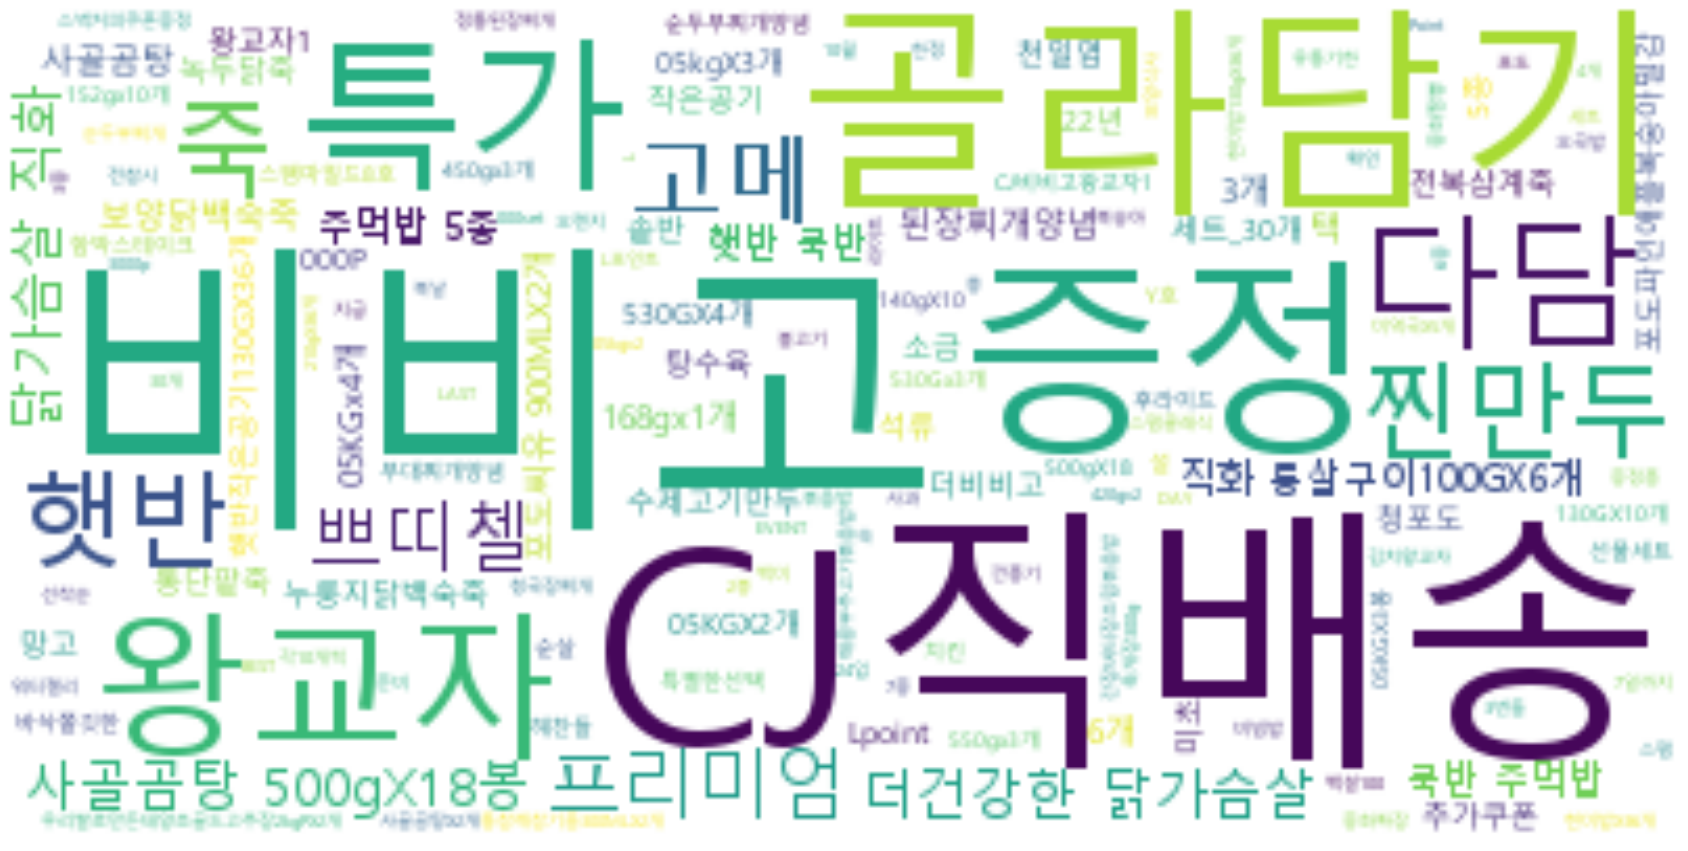

In [103]:
# 주문량이 많은 상품명 시각화
plt.figure(figsize = (30, 20))

plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [104]:
b = mon_top7['카테고리']

In [105]:
r2 = []

for i in np.arange(0, 63):
    r = b[i].split(' > ')[2]
    r2.append(r)

In [106]:
res2 = " ".join(r2)
print(res2)

만두 국/탕 카놀라유 된장/쌈장/청국장 캔/통조림선물세트 캔/통조림선물세트 햄/소시지 만두 만두 기타양념육 햄/소시지 굴소스/중화요리소스 국/탕 기타소스 만두 만두 가공조미료 튀김류 만두 피자/햄버거 국/탕 식용유/오일선물세트 된장/쌈장/청국장 된장/쌈장/청국장 가공조미료 돈가스 고추장/초고추장 햄/소시지 식용유/오일선물세트 즉석밥 만두 만두 젤리/푸딩 젤리/푸딩 즉석밥 국/탕 즉석밥 볶음밥 돈가스 즉석밥 만두 즉석밥 기타소스 즉석밥 기타면류 젤리/푸딩 즉석밥 즉석밥 즉석밥 햄통조림 국/탕 카놀라유 즉석밥 만두 돈가스 즉석밥 돈가스 국/탕 국/탕 젤리/푸딩 즉석밥 젤리/푸딩 닭가슴살통조림


In [107]:
res2 = res2.replace('/', '')

In [108]:
wc2 = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf", 
               background_color = 'white')

In [109]:
wc2.generate(res2)

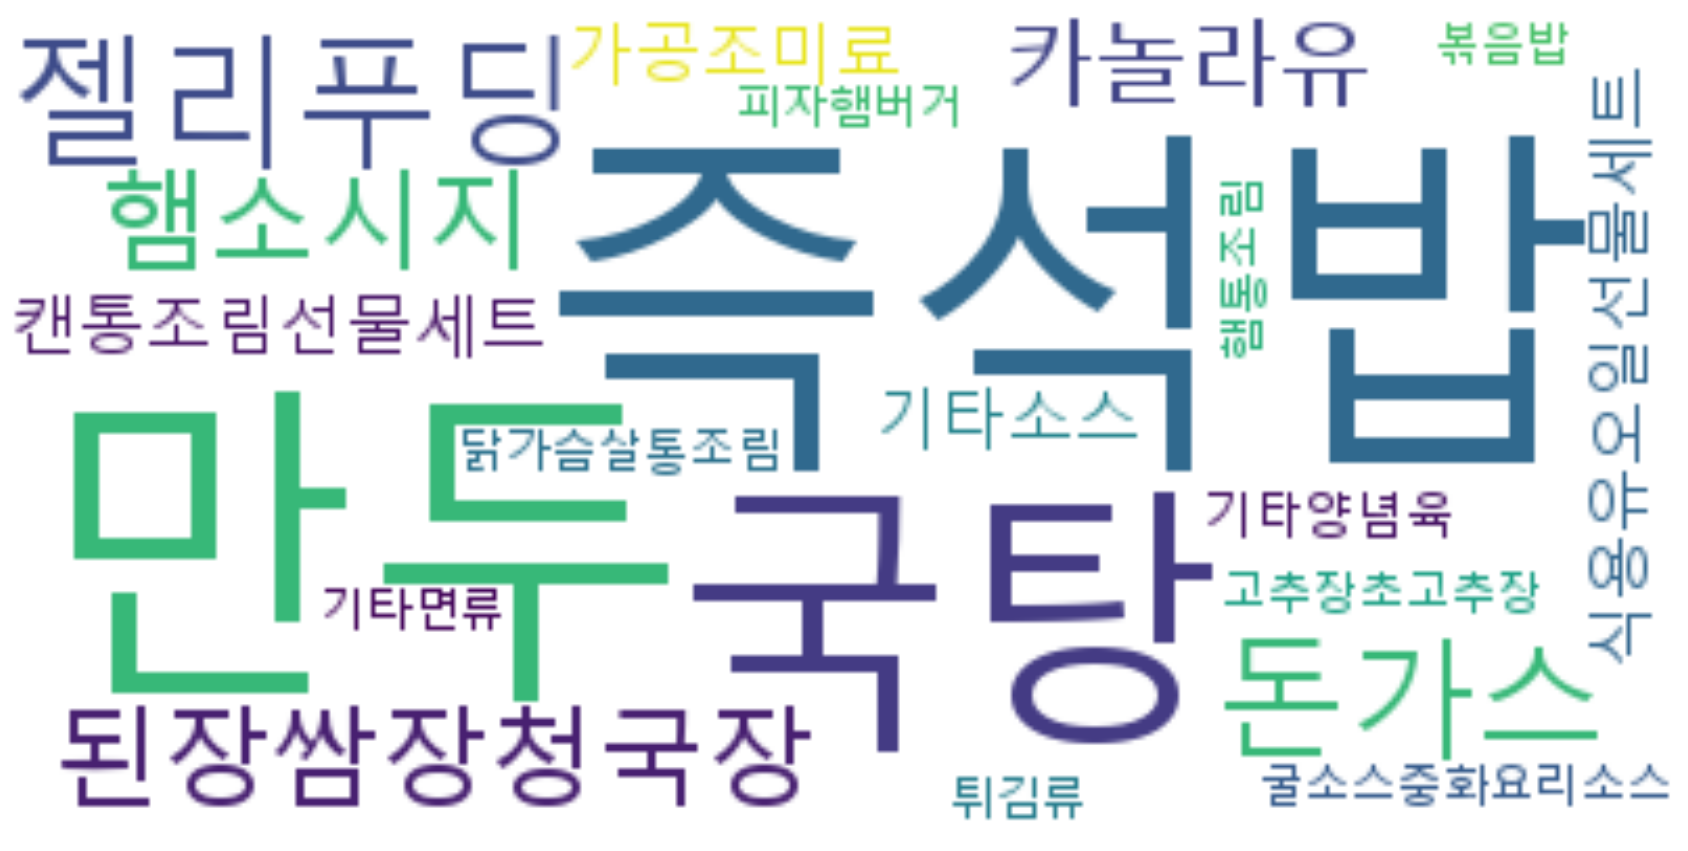

In [110]:
# 주문량이 많은 상품의 카테고리 시각화
plt.figure(figsize = (30, 20))

plt.imshow(wc2, interpolation = "bilinear")
plt.axis("off")
plt.show()

### 스팸 할인 행사

In [111]:
# CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]의 일별 주문건수
df.query("전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'").groupby(['월', '일'])[['수량']].agg(ct = ('수량', 'sum'))

ct
월 일       
8 3   4218
  4    729
  5     47
  6     23
  7     24
  8     11
  9      3
  24     1
  25     8
9 4      1
  5      1
  14     1
  19     1
  23     1
  25     3
  30     1

In [112]:
#  8월 3일부터 4일까지 CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]의 시간대별 주문건수
spam_ct = df.query("주문접수일시 >= 20220803 & 주문접수일시 <= 20220805 & 전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'").groupby([ 
                                                                        '일', '시'])[['수량']].agg(ct = ('수량', 'sum'))
spam_ct = spam_ct.reset_index()

In [113]:
spam_ct

,일,시,ct
0,3,15,3
1,3,16,40
2,3,17,538
3,3,18,740
4,3,19,639
5,3,20,147
6,3,21,676
7,3,22,811
8,3,23,624
9,4,0,342


Text(0.5, 1.0, '시간의 흐름에 따른 [스팸 골라담기] 주문건수의 변화')

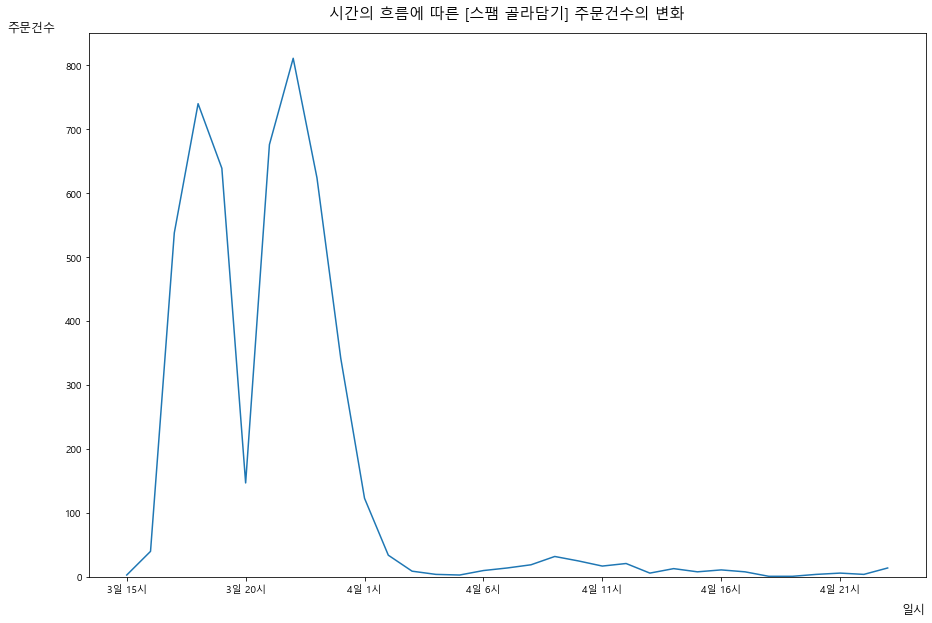

In [114]:
fig = plt.figure(figsize = (15, 10))

plt.plot(np.arange(0, 33), spam_ct['ct'])

plt.ylim(0, 850)
plt.xticks(ticks = np.arange(0, 33, 5), labels = ['3일 15시', '3일 20시', '4일 1시', '4일 6시', '4일 11시', '4일 16시', '4일 21시'])

plt.xlabel('일시', labelpad = 10, fontdict = {'size' : 12}, loc = 'right')
plt.ylabel('주문건수', labelpad = 10, fontdict = {'size' : 12}, loc = 'top', rotation = 0)

plt.title('시간의 흐름에 따른 [스팸 골라담기] 주문건수의 변화', pad = 15, size = 15)

- 8월 3일 17시, 21시에 주문량이 급증하였다.
- 8월 3일 22시, 18시 순으로 주문건수가 많았다.
- 8월 3일 20시와 8월 4일 1시에 주문량이 급감하였다.
- 할인 행사 시작 1시간부터 10시간까지 그 효과가 유지됨

In [115]:
df.query("주문접수일시 >= 20220803 & 주문접수일시 <= 20220805 & 전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'")['판매가'].value_counts()

20000    4186
23000     258
24000      51
Name: 판매가, dtype: int64

In [116]:
df.query("주문접수일시 >= 20220803 & 주문접수일시 <= 20220805  & 판매가 == 20000 & 전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'")['주문접수일시']

주문접수일시
2022-08-04 01:26:21   2022-08-04 01:26:21
2022-08-04 01:26:19   2022-08-04 01:26:19
2022-08-04 01:26:00   2022-08-04 01:26:00
2022-08-04 01:25:43   2022-08-04 01:25:43
2022-08-04 01:25:30   2022-08-04 01:25:30
                              ...        
2022-08-03 16:42:25   2022-08-03 16:42:25
2022-08-03 16:26:40   2022-08-03 16:26:40
2022-08-03 16:15:04   2022-08-03 16:15:04
2022-08-03 15:56:05   2022-08-03 15:56:05
2022-08-03 15:02:19   2022-08-03 15:02:19
Name: 주문접수일시, Length: 4186, dtype: datetime64[ns]

- 8월 4일 1시 26분까지 20000원에 판매

In [117]:
df.query("주문접수일시 >= 20220803 & 주문접수일시 <= 20220805  & 판매가 == 23000 & 전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'")[['일', '시']]

,일,시
주문접수일시,,
2022-08-04 14:17:11,4,14
2022-08-04 14:16:46,4,14
2022-08-04 14:11:46,4,14
2022-08-04 14:10:54,4,14
2022-08-04 13:54:47,4,13
...,...,...
2022-08-03 19:52:04,3,19
2022-08-03 19:51:00,3,19
2022-08-03 19:50:31,3,19


In [118]:
df.query("주문접수일시 >= 20220803 & 주문접수일시 <= 20220805  & 판매가 == 24000 & 전시상품명 == 'CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]'")['주문접수일시']

주문접수일시
2022-08-04 23:59:29   2022-08-04 23:59:29
2022-08-04 23:55:51   2022-08-04 23:55:51
2022-08-04 23:46:51   2022-08-04 23:46:51
2022-08-04 23:43:27   2022-08-04 23:43:27
2022-08-04 23:38:35   2022-08-04 23:38:35
2022-08-04 23:37:42   2022-08-04 23:37:42
2022-08-04 23:26:33   2022-08-04 23:26:33
2022-08-04 23:19:59   2022-08-04 23:19:59
2022-08-04 23:01:27   2022-08-04 23:01:27
2022-08-04 23:01:26   2022-08-04 23:01:26
2022-08-04 22:45:44   2022-08-04 22:45:44
2022-08-04 22:36:58   2022-08-04 22:36:58
2022-08-04 21:18:46   2022-08-04 21:18:46
2022-08-04 21:12:34   2022-08-04 21:12:34
2022-08-04 21:08:54   2022-08-04 21:08:54
2022-08-04 21:04:30   2022-08-04 21:04:30
2022-08-04 21:03:17   2022-08-04 21:03:17
2022-08-04 20:33:48   2022-08-04 20:33:48
2022-08-04 20:25:44   2022-08-04 20:25:44
2022-08-04 20:13:04   2022-08-04 20:13:04
2022-08-04 19:14:45   2022-08-04 19:14:45
2022-08-04 18:37:02   2022-08-04 18:37:02
2022-08-04 17:57:39   2022-08-04 17:57:39
2022-08-04 17:51:13   2022-

## 3-4 유입매체에 따른 주문건수와 평균 주문 금액 확인

### 4-1) 유입매체에 따른 월별 주문건수와 주문총액

In [119]:
df['유입매체'].value_counts()

APP       66517
MO WEB    20770
PC        14682
TABLET      107
삼성냉장고         1
Name: 유입매체, dtype: int64

In [120]:
# 유입매체 별 주문 건수

df.groupby('유입매체').agg( 주문건수 = ('아이디','count'))

,주문건수
유입매체,
APP,65787
MO WEB,18784
PC,13759
TABLET,99
삼성냉장고,1


In [121]:
# 취소되거나 반품된 주문에 대한 금액 0으로 처리
df_cp = df.copy()
df_cp.loc[(df['유형'] == '취소(주문취소)') | (df['유형'] == '반품'), '주문금액'] = 0

In [122]:
## 유입매체 별 주문 건수와 주문 총액

df_1 = df_cp.groupby(['유입매체', '월']).agg(주문건수 = ('아이디', 'count'), 주문총액 = ('주문액', 'sum'))
df_1 = df_1.reset_index()
df_1

,유입매체,월,주문건수,주문총액
0,APP,1,1440,49654528
1,APP,2,1121,29611388
2,APP,3,1898,49431139
3,APP,4,1867,48983587
4,APP,5,6618,196947826
5,APP,6,15044,427259924
6,APP,7,9088,301252466
7,APP,8,25286,683837226
8,APP,9,3425,125517538
9,MO WEB,1,975,47514933


In [123]:
#삼성 냉장고는 8월 데이터밖에 없기 때문에 시각회에서 제외
df_2 = df_1.iloc[:36]

Text(0.5, 1.0, '월별 유입매체 주문 총액')

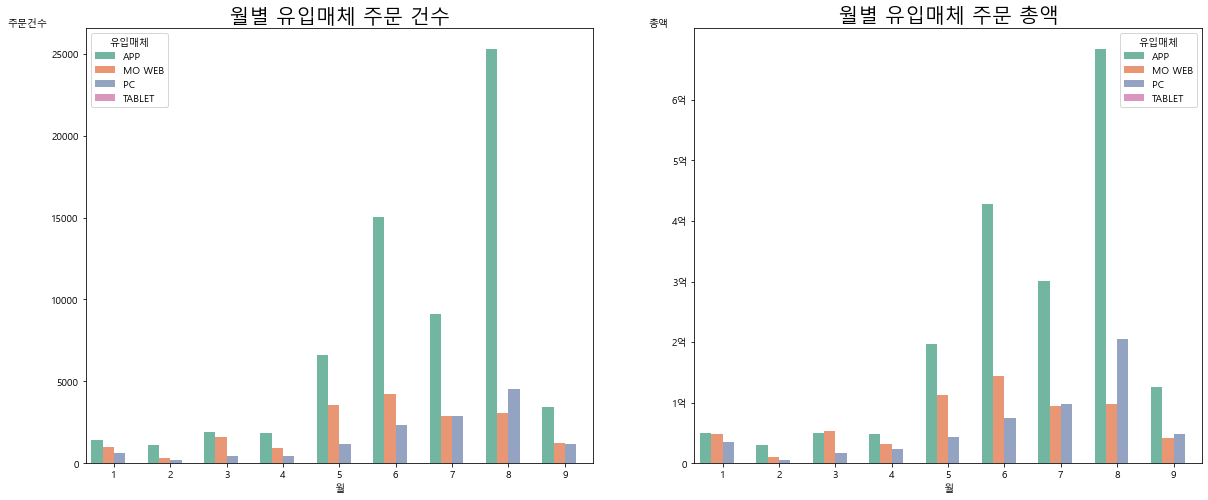

In [124]:
fig = plt.figure(figsize = (20, 8))

ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x = '월', y = '주문건수', hue = '유입매체', data = df_2, palette = 'Set2', ax = ax1)
ax1.set_xlabel('월')
ax1.set_ylabel('주문건수', loc = 'top', rotation = 0)
ax1.legend(loc = 'upper left', title = '유입매체')
ax1.set_title('월별 유입매체 주문 건수', size = 20)

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x = '월', y = '주문총액', hue = '유입매체', data = df_2,  palette = 'Set2', ax = ax2)
ax2.set_xlabel('월')
ax2.set_ylabel('총액', loc = 'top', rotation = 0)
ax2.set(yticks = [0,100000000, 200000000, 300000000, 400000000, 500000000, 600000000], yticklabels = ['0', '1억', '2억', '3억', '4억', '5억', '6억'])
ax2.set_title('월별 유입매체 주문 총액', size = 20)

Text(0.5, 1.0, '월별 유입매체 주문 총액')

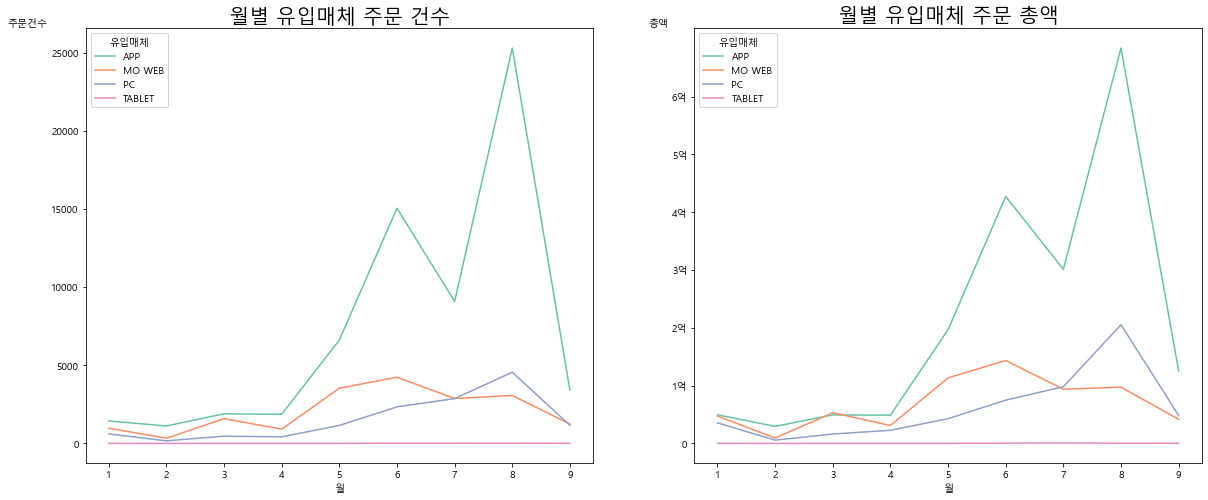

In [125]:
fig = plt.figure(figsize = (20, 8))

ax1 = fig.add_subplot(1, 2, 1)
sns.lineplot(x = '월', y = '주문건수', hue = '유입매체', data = df_2, palette = 'Set2', ax = ax1)
ax1.set_xlabel('월')
ax1.set_ylabel('주문건수', loc = 'top', rotation = 0)
ax1.legend(loc = 'upper left', title = '유입매체')
ax1.set_title('월별 유입매체 주문 건수', size = 20)

ax2 = fig.add_subplot(1, 2, 2)
sns.lineplot(x = '월', y = '주문총액', hue = '유입매체', data = df_2,  palette = 'Set2', ax = ax2)
ax2.set_xlabel('월')
ax2.set_ylabel('총액', loc = 'top', rotation = 0)
ax2.set(yticks = [0,100000000, 200000000, 300000000, 400000000, 500000000, 600000000], yticklabels = ['0', '1억', '2억', '3억', '4억', '5억', '6억'])
ax2.set_title('월별 유입매체 주문 총액', size = 20)

In [126]:
df_2.query("유입매체 == 'TABLET'").agg(주문건수 = ('주문건수','sum'))

,주문건수
주문건수,99


In [127]:
df_2.query("유입매체 == 'TABLET'").agg(주문총액 = ('주문총액','sum'))

,주문총액
주문총액,3675533


TABLET은 다른 유입매체에 비해 값이 너무 작아 그래프에 표시되지 않음

APP 이 주문 건수와 주문 총액 모두에서 가장 높음

1-4월에는 모든 매체 사이에 큰 차이가 없었지만 5~9월 사이에 APP 이용자가 급등함

7월달에 APP 이용자가 크게 감소했음

8월달에 PC 이용자가 증가함

### 4-2) 유입매체에 따른 월별 평균 주문 금액 

In [128]:
df_3 = df_cp.groupby(['유입매체', '월']).agg(평균주문금액 = ('주문액', 'mean'))
df_3 = df_3[:36].reset_index()
df_3

,유입매체,월,평균주문금액
0,APP,1,33940.210526
1,APP,2,26043.437115
2,APP,3,25718.594693
3,APP,4,25958.445681
4,APP,5,29430.338613
5,APP,6,28024.394858
6,APP,7,32841.215088
7,APP,8,26794.029700
8,APP,9,36120.154820
9,MO WEB,1,42310.715049


Text(0.5, 1.0, '월별 유입매체 평균 주문 금액')

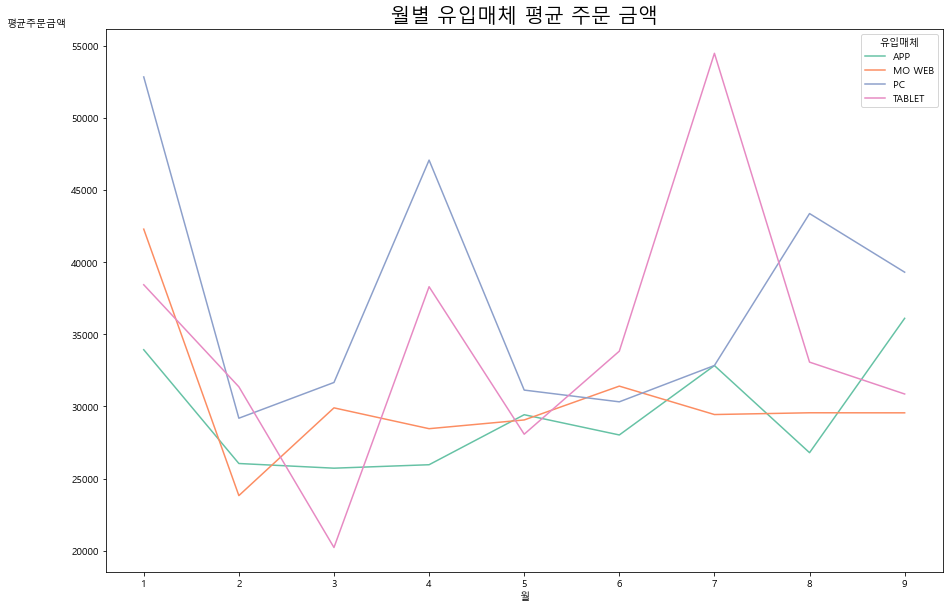

In [129]:
fig = plt.figure(figsize = (15, 10))

sns.lineplot(x = '월', y = '평균주문금액', hue = '유입매체', data = df_3, palette = 'Set2')
plt.xlabel('월')
plt.ylabel('평균주문금액', loc = 'top', rotation = 0)
plt.title('월별 유입매체 평균 주문 금액', size = 20)

평균 주문 금액의 경우 PC나 TABLET 이 가장 높게 나타남


APP의 평균 주문 금액은 대체로 가장 낮음


1,4,8 월에 PC 이용고객의 평균 주문 금액이 높았고,

1,4,7 월에 TABLET 이용고객의 평균 주문 금액이 높게 나타남


6,7 월에 TABLET 이용 고객의 평균 주문 금액이 급등함

In [130]:
df_3

,유입매체,월,평균주문금액
0,APP,1,33940.210526
1,APP,2,26043.437115
2,APP,3,25718.594693
3,APP,4,25958.445681
4,APP,5,29430.338613
5,APP,6,28024.394858
6,APP,7,32841.215088
7,APP,8,26794.029700
8,APP,9,36120.154820
9,MO WEB,1,42310.715049


### 4-3) 유입매체 별 주문 당 평균 주문액

In [131]:
# 유입매체 별 아이디 한개 당 평균 주문 금액

df_4 = df_cp.groupby(['유입매체', '주문번호']).agg(주문별주문액 = ('주문액', 'sum'))
df_4 = df_4.reset_index()
df_4

,유입매체,주문번호,주문별주문액
0,APP,2022010111866938,22300
1,APP,2022010111873735,33240
2,APP,2022010111873774,33240
3,APP,2022010111879668,23680
4,APP,2022010111898548,16760
...,...,...,...
95031,TABLET,2022092918441594,28580
95032,TABLET,2022092918470266,24500
95033,TABLET,2022092918470659,24500
95034,TABLET,2022093018631871,49000


In [132]:
df_5 = df_4.groupby('유입매체').agg(평균주문금액 = ('주문별주문액','mean'))

In [133]:
df_5['유입매체'] = df_5.index
df_5 = df_5[:4]

Text(0.5, 1.0, '유입매체 별 평균 주문 금액')

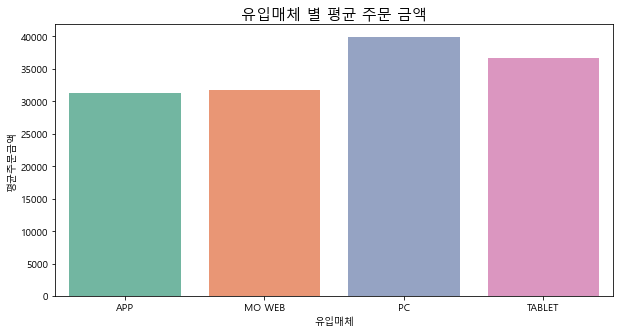

In [134]:
fig = plt.figure(figsize = (10,5))

sns.barplot(x = '유입매체', y = '평균주문금액', data = df_5, palette = 'Set2')

plt.title('유입매체 별 평균 주문 금액', size = 15)

- APP 과 MO WEB 사용자들은 모바일 유저로, 주문 당 주문액이 비교적 작음
- PC와 TABLET 사용자들은 주문 당 주문액이 비교적 큼

### 4-4) 유입매체 별 고객 선호 카테고리

In [135]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102077 entries, 2022-01-31 23:59:43 to 2022-09-01 00:05:05
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   주문번호     102077 non-null  int64         
 1   유입매체     102077 non-null  object        
 2   주문구분     102077 non-null  object        
 3   유입채널     102077 non-null  object        
 4   회원구분     102077 non-null  object        
 5   아이디      98430 non-null   object        
 6   상품주문번호   102077 non-null  object        
 7   유형       102077 non-null  object        
 8   배송회수구분   102077 non-null  object        
 9   진행단계     102077 non-null  object        
 10  구매확정     102077 non-null  object        
 11  주문완료일시   101745 non-null  datetime64[ns]
 12  구매확정일시   93595 non-null   datetime64[ns]
 13  출고지시일    93528 non-null   datetime64[ns]
 14  상태처리일시   102077 non-null  datetime64[ns]
 15  전시상품명    102077 non-null  object        
 16  전시단품명    102077 non-nu

In [136]:
# APP 이용자

df_app = df_cp.loc[df_cp['유입매체'] == 'APP']
df_app

df_app_1 = df_app.groupby('표준카테고리').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)

df_app_2 = df_app_1.head(10)
df_app_2

,평균주문액
표준카테고리,
가공식품 > 통조림/캔 > 캔/통조림선물세트,111233.004587
수산/건어물 > 수산선물세트 > 김/미역선물세트,100080.000000
가공식품 > 밀가루/믹스류 > 미숫가루,50798.578199
가공식품 > 통조림/캔 > 닭가슴살통조림,40967.332016
김치/반찬 > 김치 > 총각김치,39255.663717
김치/반찬 > 김치 > 포기김치,38594.667201
수산/건어물 > 김/해조류 > 조미김/도시락김,38287.329412
냉장/냉동/간편식 > 밀키트/쿠킹박스 > 중식/일식/아시아,35617.777778
정육/계란 > 양념육 > 돼지양념육,35067.631579


In [137]:
# WEB 이용자

df_web = df_cp.loc[df_cp['유입매체'] == 'MO WEB']
df_web

df_web_1 = df_web.groupby('표준카테고리').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)

df_web_2 = df_web_1.head(10)
df_web_2

,평균주문액
표준카테고리,
가공식품 > 통조림/캔 > 캔/통조림선물세트,138630.394737
수산/건어물 > 김/해조류 > 조미김/도시락김,85805.458333
가공식품 > 밀가루/믹스류 > 미숫가루,53350.000000
가공식품 > 통조림/캔 > 닭가슴살통조림,41272.883031
냉장/냉동/간편식 > 밀키트/쿠킹박스 > 한식,39800.000000
김치/반찬 > 김치 > 포기김치,37307.341772
냉장/냉동/간편식 > 밀키트/쿠킹박스 > 중식/일식/아시아,36325.041322
김치/반찬 > 김치 > 총각김치,34730.714286
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,34425.162085


In [138]:
# PC 이용자

df_pc = df_cp.loc[df_cp['유입매체'] == 'PC']
df_pc

df_pc_1 = df_pc.groupby('표준카테고리').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)

df_pc_2 = df_pc_1.head(10)
df_pc_2

,평균주문액
표준카테고리,
가공식품 > 통조림/캔 > 캔/통조림선물세트,130277.254464
가공식품 > 조미료/양념 > 가공조미료,104275.805825
수산/건어물 > 수산선물세트 > 김/미역선물세트,93825.000000
수산/건어물 > 김/해조류 > 조미김/도시락김,78446.842105
가공식품 > 밀가루/믹스류 > 미숫가루,48500.000000
가공식품 > 통조림/캔 > 닭가슴살통조림,46903.035714
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,39892.739826
가공식품 > 식용유/오일 > 식용유/오일선물세트,38037.224490
김치/반찬 > 김치 > 포기김치,36181.507128


In [139]:
# TABLET 이용자

df_tab = df_cp.loc[df_cp['유입매체'] == 'TABLET']
df_tab

df_tab_1 = df_tab.groupby('표준카테고리').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)

df_tab_2 = df_tab_1.head(10)
df_tab_2

,평균주문액
표준카테고리,
가공식품 > 장류 > 고추장/초고추장,119300.750000
가공식품 > 통조림/캔 > 캔/통조림선물세트,95200.000000
정육/계란 > 양념육 > 기타양념육,53110.000000
김치/반찬 > 김치 > 포기김치,44741.666667
가공식품 > 면류 > 기타면류,40833.333333
냉장/냉동/간편식 > 떡볶이/만두 > 만두,36440.000000
가공식품 > 통조림/캔 > 햄통조림,35250.000000
냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스,35201.111111
냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,35000.000000


In [140]:
labels_1 = []
for i in range(10) :
    labels_1.append(df_app_2.index[i])
    
labels_2 = []
for i in range(10) :
    labels_2.append(df_web_2.index[i])

labels_3 = []
for i in range(10) :
    labels_3.append(df_pc_2.index[i])

labels_4 = []
for i in range(10) :
    labels_4.append(df_tab_2.index[i])

In [141]:
labels_4

['가공식품 > 장류 > 고추장/초고추장',
 '가공식품 > 통조림/캔 > 캔/통조림선물세트',
 '정육/계란 > 양념육 > 기타양념육',
 '김치/반찬 > 김치 > 포기김치',
 '가공식품 > 면류 > 기타면류',
 '냉장/냉동/간편식 > 떡볶이/만두 > 만두',
 '가공식품 > 통조림/캔 > 햄통조림',
 '냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스',
 '냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지',
 '냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥']

Text(0.5, 1.0, 'TABLET 고객 선호 카테고리')

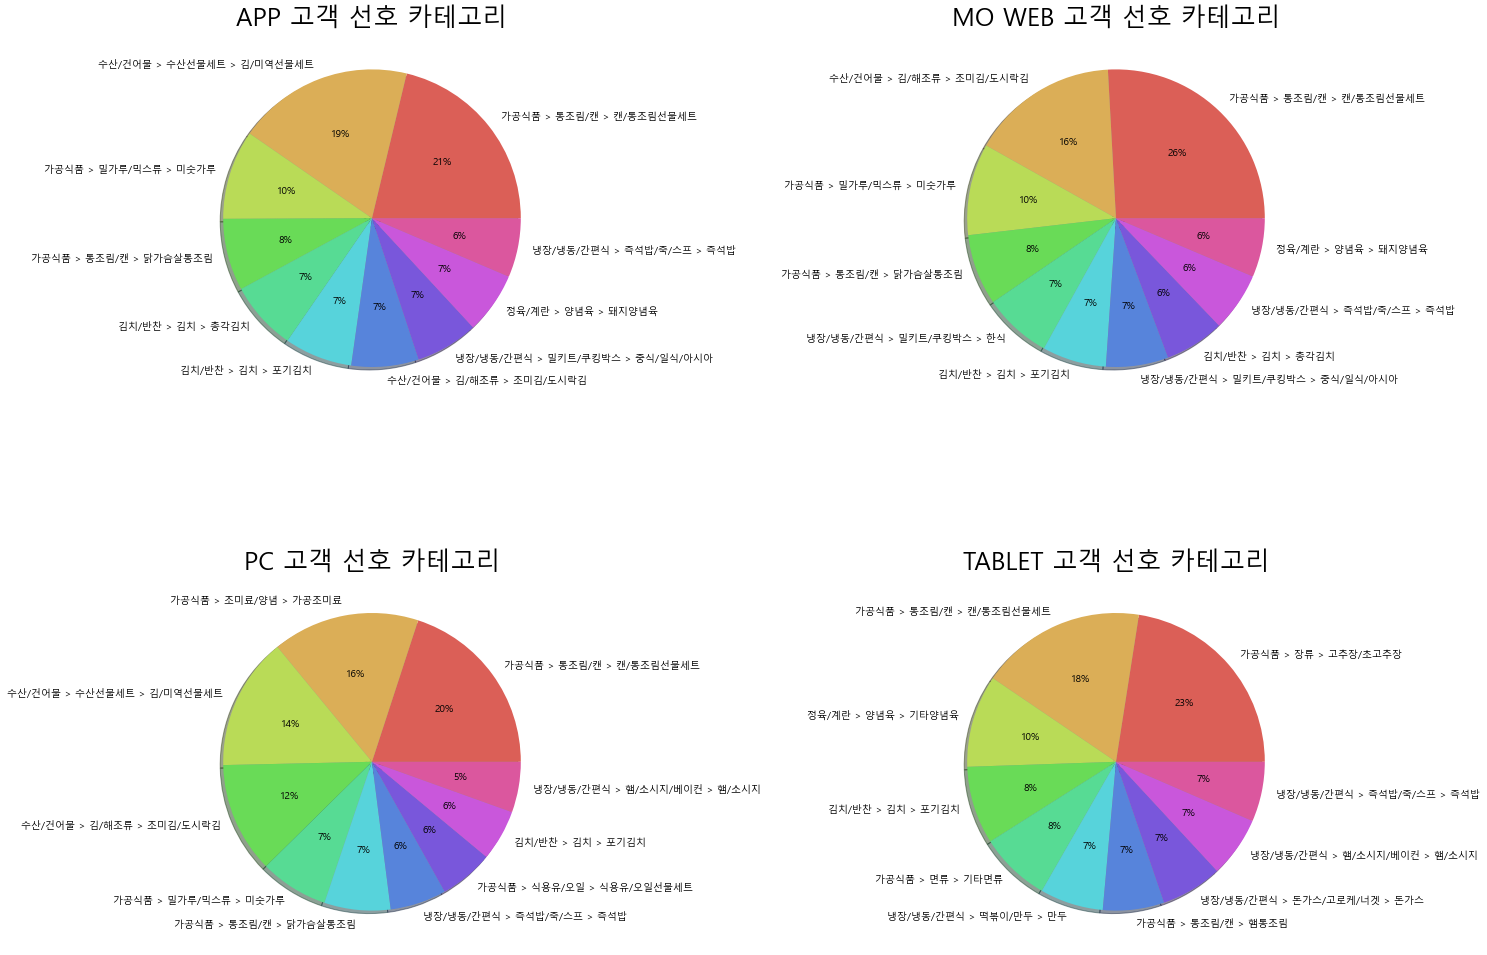

In [142]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(2,2)
plt.figure(figsize = (20,20))
plt.subplots_adjust(wspace=1, hspace=0)
colors = sns.color_palette('hls',10)

the_grid = gridspec.GridSpec(2,2)
plt.subplot(the_grid[0,0], aspect = 1)
plt.pie(df_app_2['평균주문액'], labels = labels_1, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('APP 고객 선호 카테고리', size = 25)

plt.subplot(the_grid[0,1], aspect = 1)
plt.pie(df_web_2['평균주문액'], labels = labels_2, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('MO WEB 고객 선호 카테고리', size = 25)

plt.subplot(the_grid[1,0], aspect = 1)
plt.pie(df_pc_2['평균주문액'], labels = labels_3, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('PC 고객 선호 카테고리', size = 25)

plt.subplot(the_grid[1,1], aspect = 1)
plt.pie(df_tab_2['평균주문액'], labels = labels_4, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('TABLET 고객 선호 카테고리', size = 25)

### 4-5) 유입매체 별 고객 선호 브랜드

In [143]:
# APP 이용자

df_app = df.loc[df['유입매체'] == 'APP']

df_app_b1 = df_app.groupby('브랜드').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)
df_app_b2 = df_app_b1.head(10)
df_app_b2

,평균주문액
브랜드,
밸런스밀,49966.238532
하선정,47541.631902
다시다,38032.786885
더건강한,35867.523427
햇반,35835.876047
스팸,35782.043960
맥스봉,33506.723214
맛밤,31515.934426
고메,30115.070103


In [144]:
# WEB 이용자

df_web = df.loc[df['유입매체'] == 'MO WEB']

df_web_b1 = df_web.groupby('브랜드').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)
df_web_b2 = df_web_b1.head(10)
df_web_b2

,평균주문액
브랜드,
스팸,55537.517900
다시다,50537.000000
밸런스밀,50457.727273
쉐프솔루션,48956.169014
하선정,42847.218341
더건강한,37064.028484
햇반,34093.430419
맥스봉,33159.032258
명가,31238.392857


In [145]:
# PC 이용자

df_pc = df.loc[df['유입매체'] == 'PC']

df_pc_b1 = df_pc.groupby('브랜드').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)
df_pc_b2 = df_pc_b1.head(10)
df_pc_b2

,평균주문액
브랜드,
다시다,813465.454545
스팸,107716.696589
밸런스밀,46941.666667
하선정,43674.209091
명가,42121.071429
더건강한,42020.738182
맥스봉,41920.216667
햇반,41055.729058
쉐프솔루션,40682.765957


In [146]:
# TABLET 이용자

df_tab = df.loc[df['유입매체'] == 'TABLET']

df_tab_b1 = df_tab.groupby('브랜드').agg(평균주문액 = ('주문액','mean')).sort_values('평균주문액',ascending = False)
df_tab_b2 = df_tab_b1.head(10)
df_tab_b2

,평균주문액
브랜드,
해찬들,119300.750000
쉐프솔루션,70595.000000
스팸,47240.000000
하선정,43730.000000
햇반,36421.428571
고메,35851.666667
더건강한,33060.000000
쁘띠첼,32000.000000
비비고,31012.272727


In [147]:
labels_b1 = []
for i in range(10) :
    labels_b1.append(df_app_b2.index[i])
    
labels_b2 = []
for i in range(10) :
    labels_b2.append(df_web_b2.index[i])

labels_b3 = []
for i in range(10) :
    labels_b3.append(df_pc_b2.index[i])

labels_b4 = []
for i in range(10) :
    labels_b4.append(df_tab_b2.index[i])

In [148]:
labels_b4

['해찬들', '쉐프솔루션', '스팸', '하선정', '햇반', '고메', '더건강한', '쁘띠첼', '비비고', 0]

Text(0.5, 1.0, 'TABLET 고객 선호 브랜드')

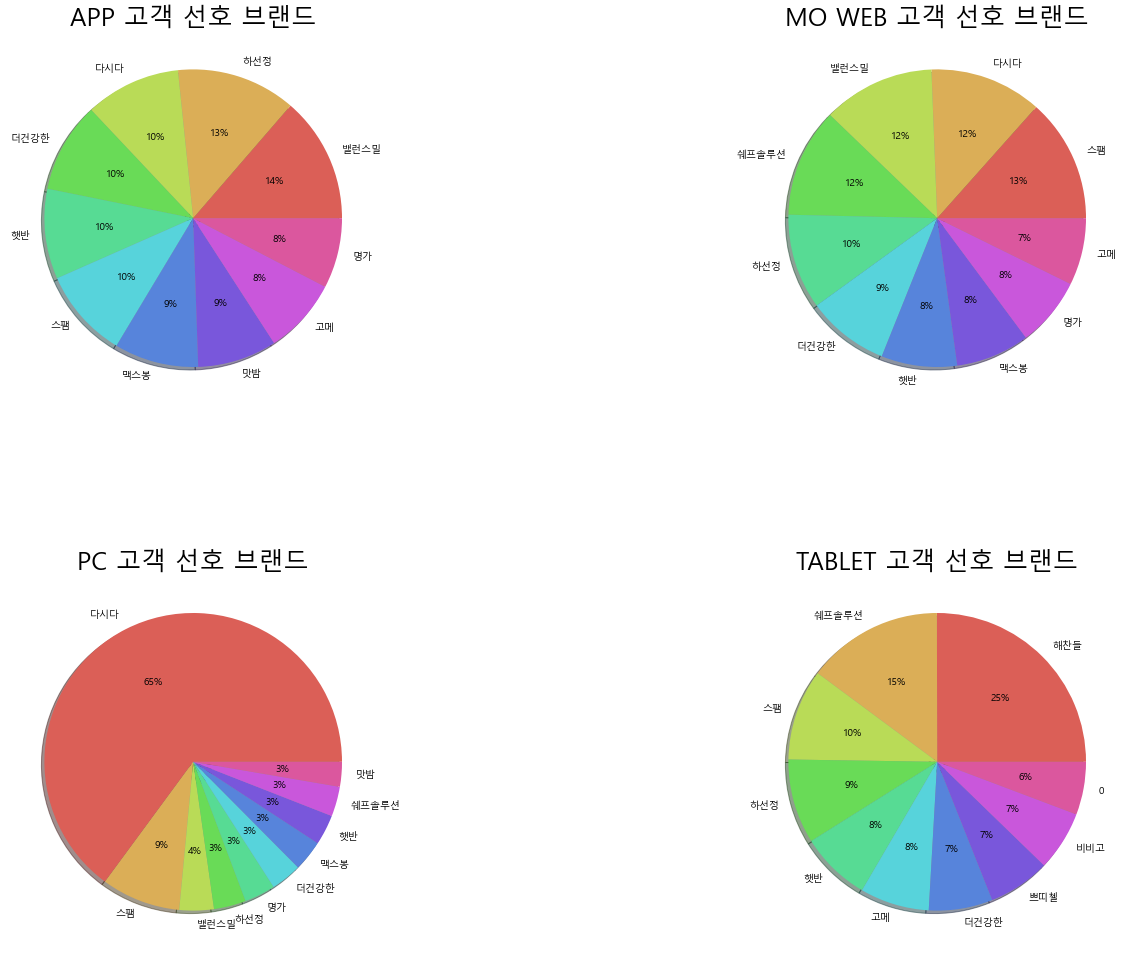

In [149]:
grid = gridspec.GridSpec(2,2)
plt.figure(figsize = (20,20))
plt.subplots_adjust(wspace=1, hspace=0)
colors = sns.color_palette('hls',10)

the_grid = gridspec.GridSpec(2,2)
plt.subplot(the_grid[0,0], aspect = 1)
plt.pie(df_app_b2['평균주문액'], labels = labels_b1, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('APP 고객 선호 브랜드', size = 25)

plt.subplot(the_grid[0,1], aspect = 1)
plt.pie(df_web_b2['평균주문액'], labels = labels_b2, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('MO WEB 고객 선호 브랜드', size = 25)

plt.subplot(the_grid[1,0], aspect = 1)
plt.pie(df_pc_b2['평균주문액'], labels = labels_b3, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('PC 고객 선호 브랜드', size = 25)

plt.subplot(the_grid[1,1], aspect = 1)
plt.pie(df_tab_b2['평균주문액'], labels = labels_b4, autopct = '%.0f%%', shadow = True, colors = colors)
plt.title('TABLET 고객 선호 브랜드', size = 25)